In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np
import scipy

# Read in data

In [2]:
results_2222 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed2222.gz')
results_3333 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed3333.gz')
results_4444 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed4444.gz')
results_5555 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed5555.gz')
results_6666 = load_results('../../results/results_TA_final/results_300_scenarios_TA_seed6666.gz')


In [3]:
experiments_2222, outcomes_2222 = results_2222
experiments_3333, outcomes_3333 = results_3333
experiments_4444, outcomes_4444 = results_4444
experiments_5555, outcomes_5555 = results_5555
experiments_6666, outcomes_6666 = results_6666

In [4]:
column_names = ["$TA_{1}$", "$TA_{2}$", "$TA_{3}$"]

In [5]:
experiments_2222 = experiments_2222.rename(columns={"TA1": column_names[0], "TA2": column_names[1], "TA3": column_names[2]})
experiments_3333 = experiments_3333.rename(columns={"TA1": column_names[0], "TA2": column_names[1], "TA3": column_names[2]})
experiments_4444 = experiments_4444.rename(columns={"TA1": column_names[0], "TA2": column_names[1], "TA3": column_names[2]})
experiments_5555 = experiments_5555.rename(columns={"TA1": column_names[0], "TA2": column_names[1], "TA3": column_names[2]})
experiments_6666 = experiments_6666.rename(columns={"TA1": column_names[0], "TA2": column_names[1], "TA3": column_names[2]})


In [6]:
experiments_2222.keys()

Index(['$TA_{1}$', '$TA_{2}$', '$TA_{3}$', 'scenario', 'policy', 'model'], dtype='object')

In [7]:
outcomes_2222.keys()

dict_keys(['continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'node_frequency_mean', 'node_frequency_var'])

In [8]:
outcomes_2222['continuity_var'] = outcomes_2222['continuity_vars']
outcomes_3333['continuity_var'] = outcomes_3333['continuity_vars']
outcomes_4444['continuity_var'] = outcomes_4444['continuity_vars']
outcomes_5555['continuity_var'] = outcomes_5555['continuity_vars']
outcomes_6666['continuity_var'] = outcomes_6666['continuity_vars']

outcomes_2222['connectivity_var'] = outcomes_2222['connectivity_vars']
outcomes_3333['connectivity_var'] = outcomes_3333['connectivity_vars']
outcomes_4444['connectivity_var'] = outcomes_4444['connectivity_vars']
outcomes_5555['connectivity_var'] = outcomes_5555['connectivity_vars']
outcomes_6666['connectivity_var'] = outcomes_6666['connectivity_vars']

In [9]:
outcomes_2222.keys()

dict_keys(['continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'node_frequency_mean', 'node_frequency_var', 'continuity_var', 'connectivity_var'])

In [10]:
outcomes_2222.pop('continuity_vars')
outcomes_3333.pop('continuity_vars')
outcomes_4444.pop('continuity_vars')
outcomes_5555.pop('continuity_vars')
outcomes_6666.pop('continuity_vars')

outcomes_2222.pop('connectivity_vars')
outcomes_3333.pop('connectivity_vars')
outcomes_4444.pop('connectivity_vars')
outcomes_5555.pop('connectivity_vars')
outcomes_6666.pop('connectivity_vars')

array([1.36046005, 1.42047321, 1.01048129, 1.17511042, 1.16766408,
       0.87478095, 1.33900338, 0.78630032, 1.30607456, 1.25591077,
       1.61032113, 1.12309577, 1.2700418 , 0.69715245, 0.6744656 ,
       0.72631256, 1.86365566, 1.03654912, 1.21056491, 1.12554969,
       1.29747895, 0.78464408, 1.32654219, 0.65065441, 1.29588041,
       1.49754253, 1.76836163, 0.83897801, 1.37175324, 1.28464741,
       0.90781075, 1.08294949, 0.97946818, 0.904975  , 0.68539278,
       0.92638184, 1.34897909, 1.55955581, 0.72297923, 1.16072214,
       1.06268008, 1.17141284, 1.74717252, 1.60598555, 0.70946516,
       1.53929837, 1.08908387, 1.29908415, 1.45111754, 1.34542112,
       1.55283257, 1.86376685, 2.16539163, 1.01547175, 1.56733407,
       0.61264211, 0.83444917, 1.06745633, 1.64391455, 0.88221232,
       0.85250748, 0.75365487, 1.08340451, 1.32838981, 0.97558149,
       1.0391818 , 0.65475927, 1.04436857, 0.74398599, 1.36832038,
       0.9752806 , 1.38552345, 1.54665782, 1.31209846, 0.62715

In [11]:
outcomes_2222.keys()

dict_keys(['continuity_mean', 'connectivity_mean', 'node_frequency_mean', 'node_frequency_var', 'continuity_var', 'connectivity_var'])

In [12]:
outcomes_change = outcomes_2222

In [13]:
outcomes_2222 = {}
outcomes_2222["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_2222["continuity_var"] = outcomes_change['continuity_var']
outcomes_2222["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_2222["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_2222["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_2222["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [14]:
outcomes_change = outcomes_3333
outcomes_3333 = {}
outcomes_3333["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_3333["continuity_var"] = outcomes_change['continuity_var']
outcomes_3333["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_3333["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_3333["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_3333["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [15]:
outcomes_change = outcomes_4444
outcomes_4444 = {}
outcomes_4444["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_4444["continuity_var"] = outcomes_change['continuity_var']
outcomes_4444["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_4444["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_4444["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_4444["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [16]:
outcomes_change = outcomes_5555
outcomes_5555 = {}
outcomes_5555["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_5555["continuity_var"] = outcomes_change['continuity_var']
outcomes_5555["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_5555["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_5555["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_5555["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [17]:
outcomes_change = outcomes_6666
outcomes_6666 = {}
outcomes_6666["continuity_mean"] = outcomes_change['continuity_mean']
outcomes_6666["continuity_var"] = outcomes_change['continuity_var']
outcomes_6666["connectivity_mean"] = outcomes_change['connectivity_mean']
outcomes_6666["connectivity_var"] = outcomes_change['connectivity_var']
outcomes_6666["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
outcomes_6666["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [18]:
print(round(outcomes_2222["continuity_mean"].mean(), 2))
print(round(outcomes_2222["continuity_mean"].std(), 2))
print(round(outcomes_2222["continuity_mean"].std()/outcomes_2222["continuity_mean"].mean(), 2))
print(round(outcomes_2222["continuity_var"].mean(), 2))
print(round(outcomes_2222["continuity_var"].std(), 2))
print(round(outcomes_2222["continuity_var"].std()/outcomes_2222["continuity_var"].mean(), 2))
print(round(outcomes_2222["connectivity_mean"].mean(), 2))
print(round(outcomes_2222["connectivity_mean"].std(), 2))
print(round(outcomes_2222["connectivity_mean"].std()/outcomes_2222["connectivity_mean"].mean(), 2))
print(round(outcomes_2222["connectivity_var"].mean(), 2))
print(round(outcomes_2222["connectivity_var"].std(), 2))
print(round(outcomes_2222["connectivity_var"].std()/outcomes_2222["connectivity_var"].mean(), 2))
print(round(outcomes_2222["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_2222["vertex_frequency_mean"].std(), 2))
print(round(outcomes_2222["vertex_frequency_mean"].std()/outcomes_2222["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_2222["vertex_frequency_var"].mean(), 2))
print(round(outcomes_2222["vertex_frequency_var"].std(), 2))
print(round(outcomes_2222["vertex_frequency_var"].std()/outcomes_2222["vertex_frequency_var"].mean(), 2))

1.45
0.16
0.11
0.3
0.12
0.4
2.88
0.16
0.06
1.56
0.31
0.2
5.54
0.26
0.05
8.97
0.67
0.08


In [19]:
print(round(outcomes_3333["continuity_mean"].mean(), 2))
print(round(outcomes_3333["continuity_mean"].std(), 2))
print(round(outcomes_3333["continuity_mean"].std()/outcomes_3333["continuity_mean"].mean(), 2))
print(round(outcomes_3333["continuity_var"].mean(), 2))
print(round(outcomes_3333["continuity_var"].std(), 2))
print(round(outcomes_3333["continuity_var"].std()/outcomes_3333["continuity_var"].mean(), 2))
print(round(outcomes_3333["connectivity_mean"].mean(), 2))
print(round(outcomes_3333["connectivity_mean"].std(), 2))
print(round(outcomes_3333["connectivity_mean"].std()/outcomes_3333["connectivity_mean"].mean(), 2))
print(round(outcomes_3333["connectivity_var"].mean(), 2))
print(round(outcomes_3333["connectivity_var"].std(), 2))
print(round(outcomes_3333["connectivity_var"].std()/outcomes_3333["connectivity_var"].mean(), 2))
print(round(outcomes_3333["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_3333["vertex_frequency_mean"].std(), 2))
print(round(outcomes_3333["vertex_frequency_mean"].std()/outcomes_3333["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_3333["vertex_frequency_var"].mean(), 2))
print(round(outcomes_3333["vertex_frequency_var"].std(), 2))
print(round(outcomes_3333["vertex_frequency_var"].std()/outcomes_3333["vertex_frequency_var"].mean(), 2))

1.44
0.19
0.13
0.25
0.12
0.5
2.96
0.2
0.07
1.31
0.14
0.11
5.64
0.23
0.04
8.88
0.47
0.05


In [20]:
print(round(outcomes_4444["continuity_mean"].mean(), 2))
print(round(outcomes_4444["continuity_mean"].std(), 2))
print(round(outcomes_4444["continuity_mean"].std()/outcomes_4444["continuity_mean"].mean(), 2))
print(round(outcomes_4444["continuity_var"].mean(), 2))
print(round(outcomes_4444["continuity_var"].std(), 2))
print(round(outcomes_4444["continuity_var"].std()/outcomes_4444["continuity_var"].mean(), 2))
print(round(outcomes_4444["connectivity_mean"].mean(), 2))
print(round(outcomes_4444["connectivity_mean"].std(), 2))
print(round(outcomes_4444["connectivity_mean"].std()/outcomes_4444["connectivity_mean"].mean(), 2))
print(round(outcomes_4444["connectivity_var"].mean(), 2))
print(round(outcomes_4444["connectivity_var"].std(), 2))
print(round(outcomes_4444["connectivity_var"].std()/outcomes_4444["continuity_mean"].mean(), 2))
print(round(outcomes_4444["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_4444["vertex_frequency_mean"].std(), 2))
print(round(outcomes_4444["vertex_frequency_mean"].std()/outcomes_4444["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_4444["vertex_frequency_var"].mean(), 2))
print(round(outcomes_4444["vertex_frequency_var"].std(), 2))
print(round(outcomes_4444["vertex_frequency_var"].std()/outcomes_4444["vertex_frequency_var"].mean(), 2))

1.81
0.3
0.17
0.69
0.38
0.56
2.79
0.2
0.07
1.17
0.24
0.14
5.17
0.3
0.06
9.28
0.55
0.06


In [21]:
print(round(outcomes_5555["continuity_mean"].mean(), 2))
print(round(outcomes_5555["continuity_mean"].std(), 2))
print(round(outcomes_5555["continuity_mean"].std()/outcomes_5555["continuity_mean"].mean(), 2))
print(round(outcomes_5555["continuity_var"].mean(), 2))
print(round(outcomes_5555["continuity_var"].std(), 2))
print(round(outcomes_5555["continuity_var"].std()/outcomes_5555["continuity_var"].mean(), 2))
print(round(outcomes_5555["connectivity_mean"].mean(), 2))
print(round(outcomes_5555["connectivity_mean"].std(), 2))
print(round(outcomes_5555["connectivity_mean"].std()/outcomes_5555["connectivity_mean"].mean(), 2))
print(round(outcomes_5555["connectivity_var"].mean(), 2))
print(round(outcomes_5555["connectivity_var"].std(), 2))
print(round(outcomes_5555["connectivity_var"].std()/outcomes_5555["connectivity_var"].mean(), 2))
print(round(outcomes_5555["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_5555["vertex_frequency_mean"].std(), 2))
print(round(outcomes_5555["vertex_frequency_mean"].std()/outcomes_5555["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_5555["vertex_frequency_var"].mean(), 2))
print(round(outcomes_5555["vertex_frequency_var"].std(), 2))
print(round(outcomes_5555["vertex_frequency_var"].std()/outcomes_5555["vertex_frequency_var"].mean(), 2))

1.52
0.22
0.14
0.34
0.17
0.5
2.68
0.18
0.07
1.11
0.23
0.2
5.45
0.33
0.06
9.13
0.74
0.08


In [22]:
print(round(outcomes_6666["continuity_mean"].mean(), 2))
print(round(outcomes_6666["continuity_mean"].std(), 2))
print(round(outcomes_6666["continuity_mean"].std()/outcomes_6666["continuity_mean"].mean(), 2))
print(round(outcomes_6666["continuity_var"].mean(), 2))
print(round(outcomes_6666["continuity_var"].std(), 2))
print(round(outcomes_6666["continuity_var"].std()/outcomes_6666["continuity_var"].mean(), 2))
print(round(outcomes_6666["connectivity_mean"].mean(), 2))
print(round(outcomes_6666["connectivity_mean"].std(), 2))
print(round(outcomes_6666["connectivity_mean"].std()/outcomes_6666["connectivity_mean"].mean(), 2))
print(round(outcomes_6666["connectivity_var"].mean(), 2))
print(round(outcomes_6666["connectivity_var"].std(), 2))
print(round(outcomes_6666["connectivity_var"].std()/outcomes_6666["connectivity_var"].mean(), 2))
print(round(outcomes_6666["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_6666["vertex_frequency_mean"].std(), 2))
print(round(outcomes_6666["vertex_frequency_mean"].std()/outcomes_6666["vertex_frequency_mean"].mean(), 2))
print(round(outcomes_6666["vertex_frequency_var"].mean(), 2))
print(round(outcomes_6666["vertex_frequency_var"].std(), 2))
print(round(outcomes_6666["vertex_frequency_var"].std()/outcomes_6666["vertex_frequency_var"].mean(), 2))

1.74
0.31
0.18
0.59
0.34
0.57
2.73
0.2
0.07
1.16
0.31
0.27
5.36
0.31
0.06
9.26
0.7
0.08


## Code for making histograms

In [16]:
def make_histogram_full(outcome):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    histogram = pd.Series(outcome.get("continuity_mean"))
    axs[0, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 0].set_title("Continuity_mean")
    axs[0, 0].set_xlabel('Value')
    axs[0, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("continuity_vars"))
    axs[0, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 1].set_title("Continuity_vars")
    axs[0, 1].set_xlabel('Value')
    axs[0, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_mean"))
    axs[1, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 0].set_title("Connectivity_mean")
    axs[1, 0].set_xlabel('Value')
    axs[1, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_vars"))
    axs[1, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 1].set_title("Connectivity_vars")
    axs[1, 1].set_xlabel('Value')
    axs[1, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("node_frequency_mean"))
    axs[2, 0].hist(histogram, bins=20, rwidth=0.9,
                          color='#607c8e')
    axs[2, 0].set_title("node_frequency_mean")
    axs[2, 0].set_xlabel('Value')
    axs[2, 0].set_ylabel('Frequency')


    histogram = pd.Series(outcome.get("node_frequency_var"))
    axs[2, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[2, 1].set_title("node_frequency_vars")
    axs[2, 1].set_xlabel('Value')
    axs[2, 1].set_ylabel('Frequency')

## Feature importance and plotting outcomes per seed

### Seed 2222

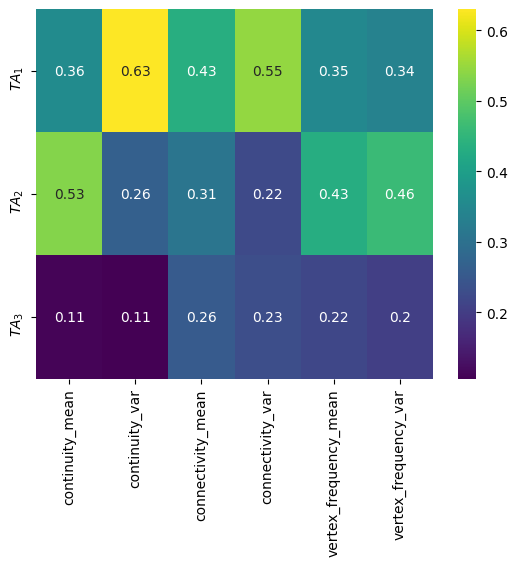

In [49]:
fs = feature_scoring.get_feature_scores_all(experiments_2222[column_names], outcomes_2222)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('TA_ETRF_seed2222.png', bbox_inches='tight')

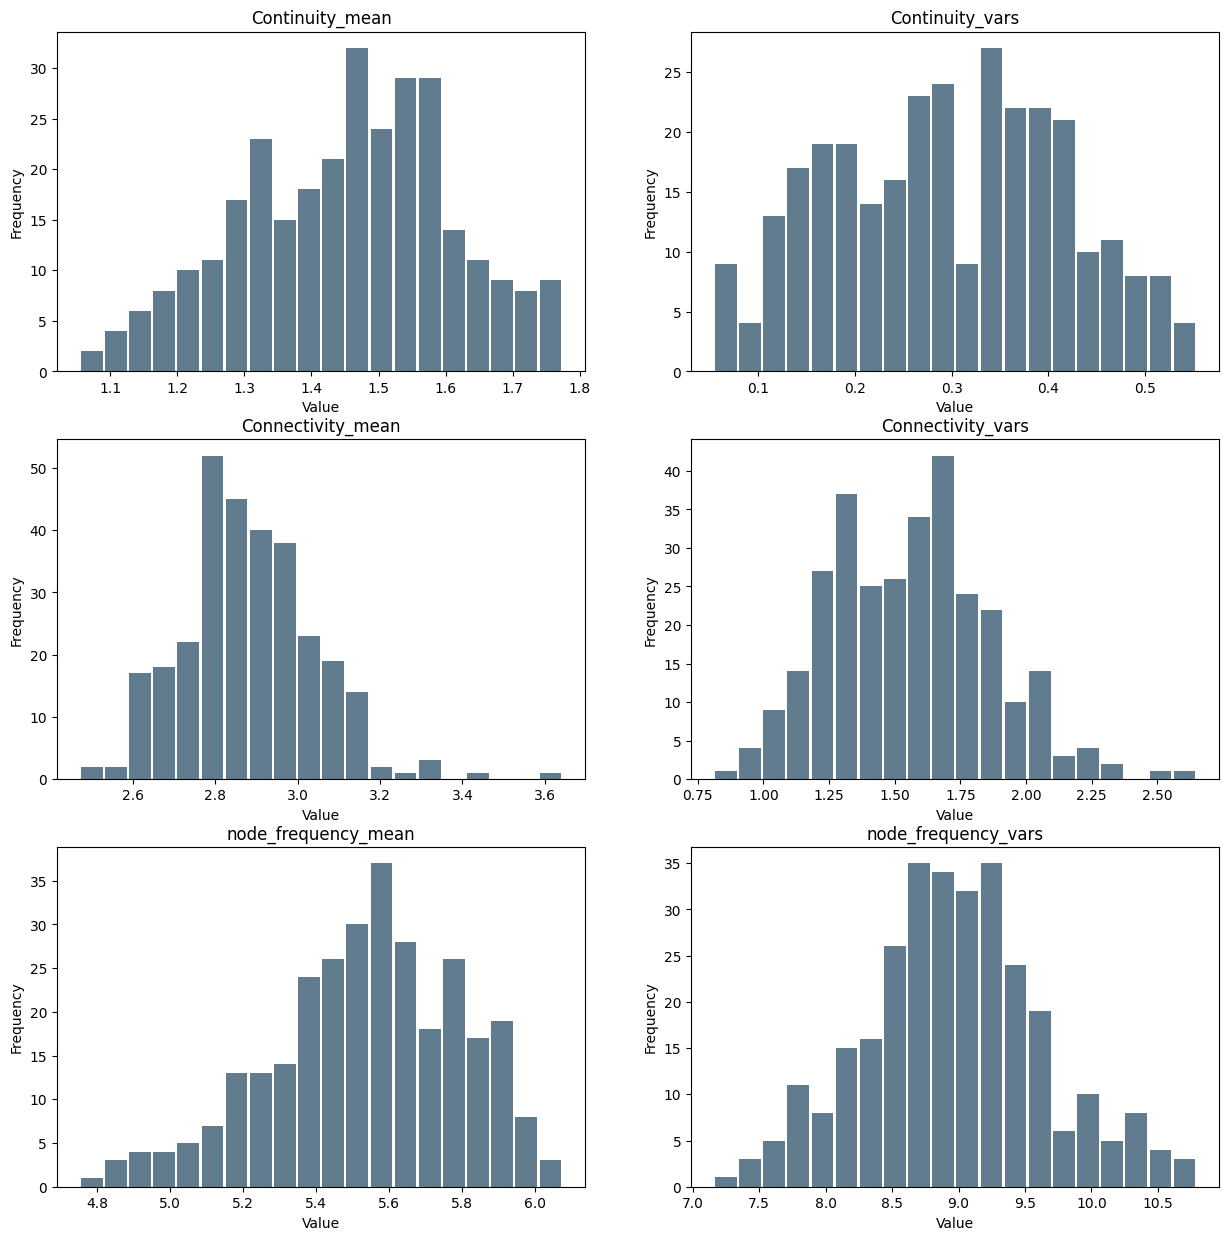

In [43]:
make_histogram_full(outcomes_2222)

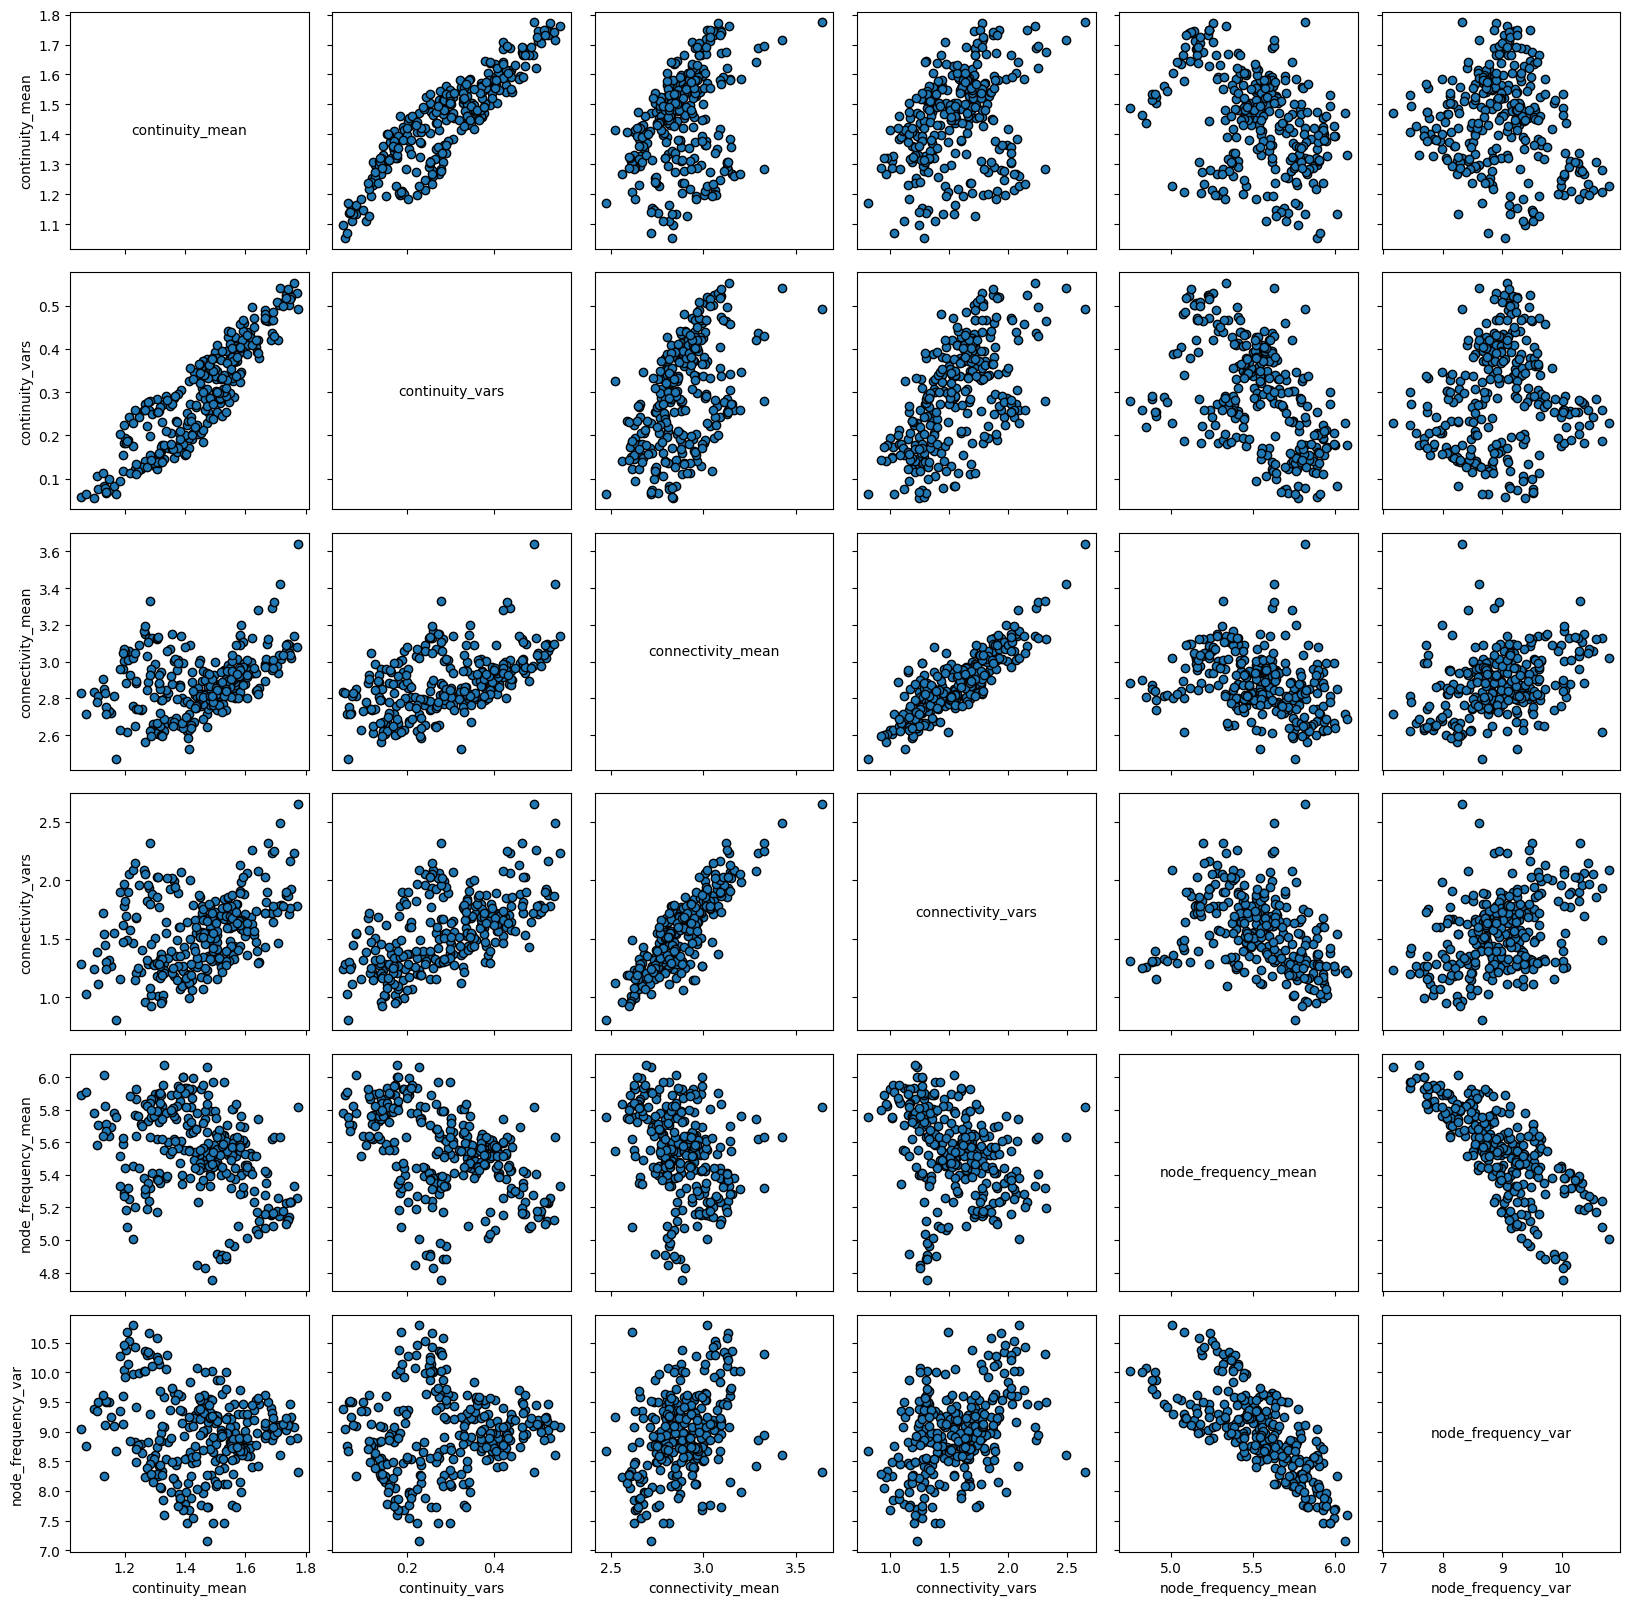

In [49]:
fig, axes = pairs_plotting.pairs_scatter(experiments_2222, outcomes_2222, legend=True)
fig.set_size_inches(20, 20)
plt.show()

correlatie

In [37]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['TA1', "TA2", 'TA3']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_2222[value1], pd.DataFrame(outcomes_2222)[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_2222[value1], pd.DataFrame(outcomes_2222)[value2])[1]
             

In [38]:
corr_mat

continuity_mean continuity_var connectivity_mean connectivity_var  \
TA1         0.40709       0.602943          0.383902         0.516388   
TA2        0.559331       0.342609          0.126511         -0.05476   
TA3        0.028852      -0.011639          0.011371        -0.117726   

    node_frequency_mean node_frequency_var  
TA1            -0.31893           0.216187  
TA2           -0.182118          -0.122007  
TA3           -0.036477           0.031126

In [39]:
p_mat

continuity_mean  continuity_var  connectivity_mean  connectivity_var  \
TA1     7.356225e-26    1.092896e-54       3.539956e-23      1.385600e-40   
TA2     2.598184e-47    8.784105e-19       1.083979e-03      1.572268e-01   
TA3     4.561262e-01    7.636964e-01       7.689724e-01      2.359044e-03   

     node_frequency_mean  node_frequency_var  
TA1         1.751671e-16        2.348829e-08  
TA2         2.549676e-06        1.624700e-03  
TA3         3.460874e-01        4.214058e-01

### Seed 3333

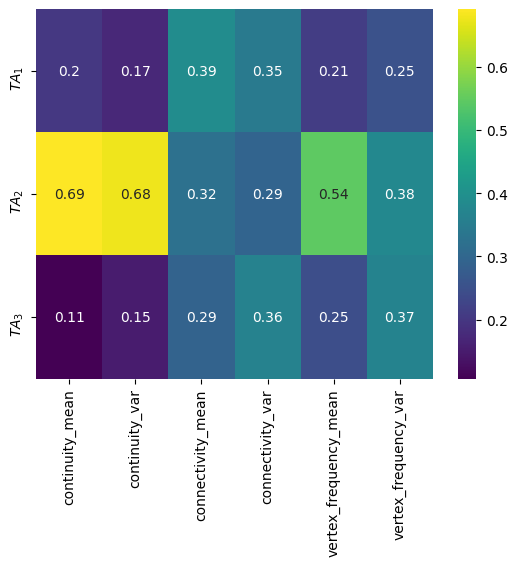

In [50]:
fs = feature_scoring.get_feature_scores_all(experiments_3333[column_names], outcomes_3333)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('TA_ETRF_seed3333.png', bbox_inches='tight')

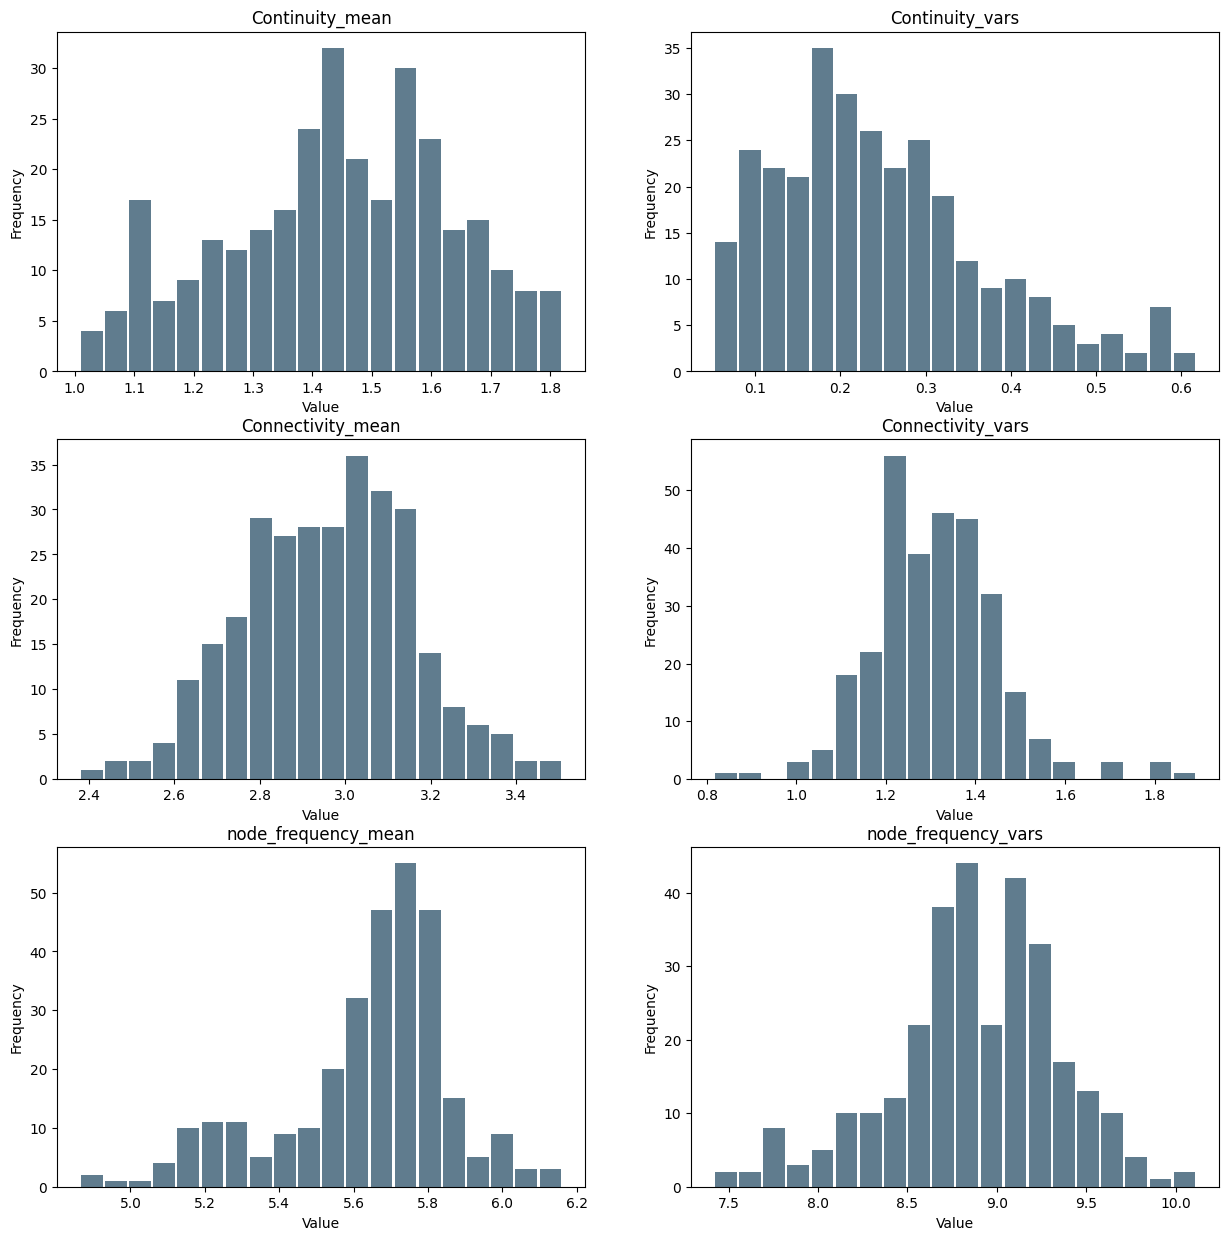

In [44]:
make_histogram_full(outcomes_3333)

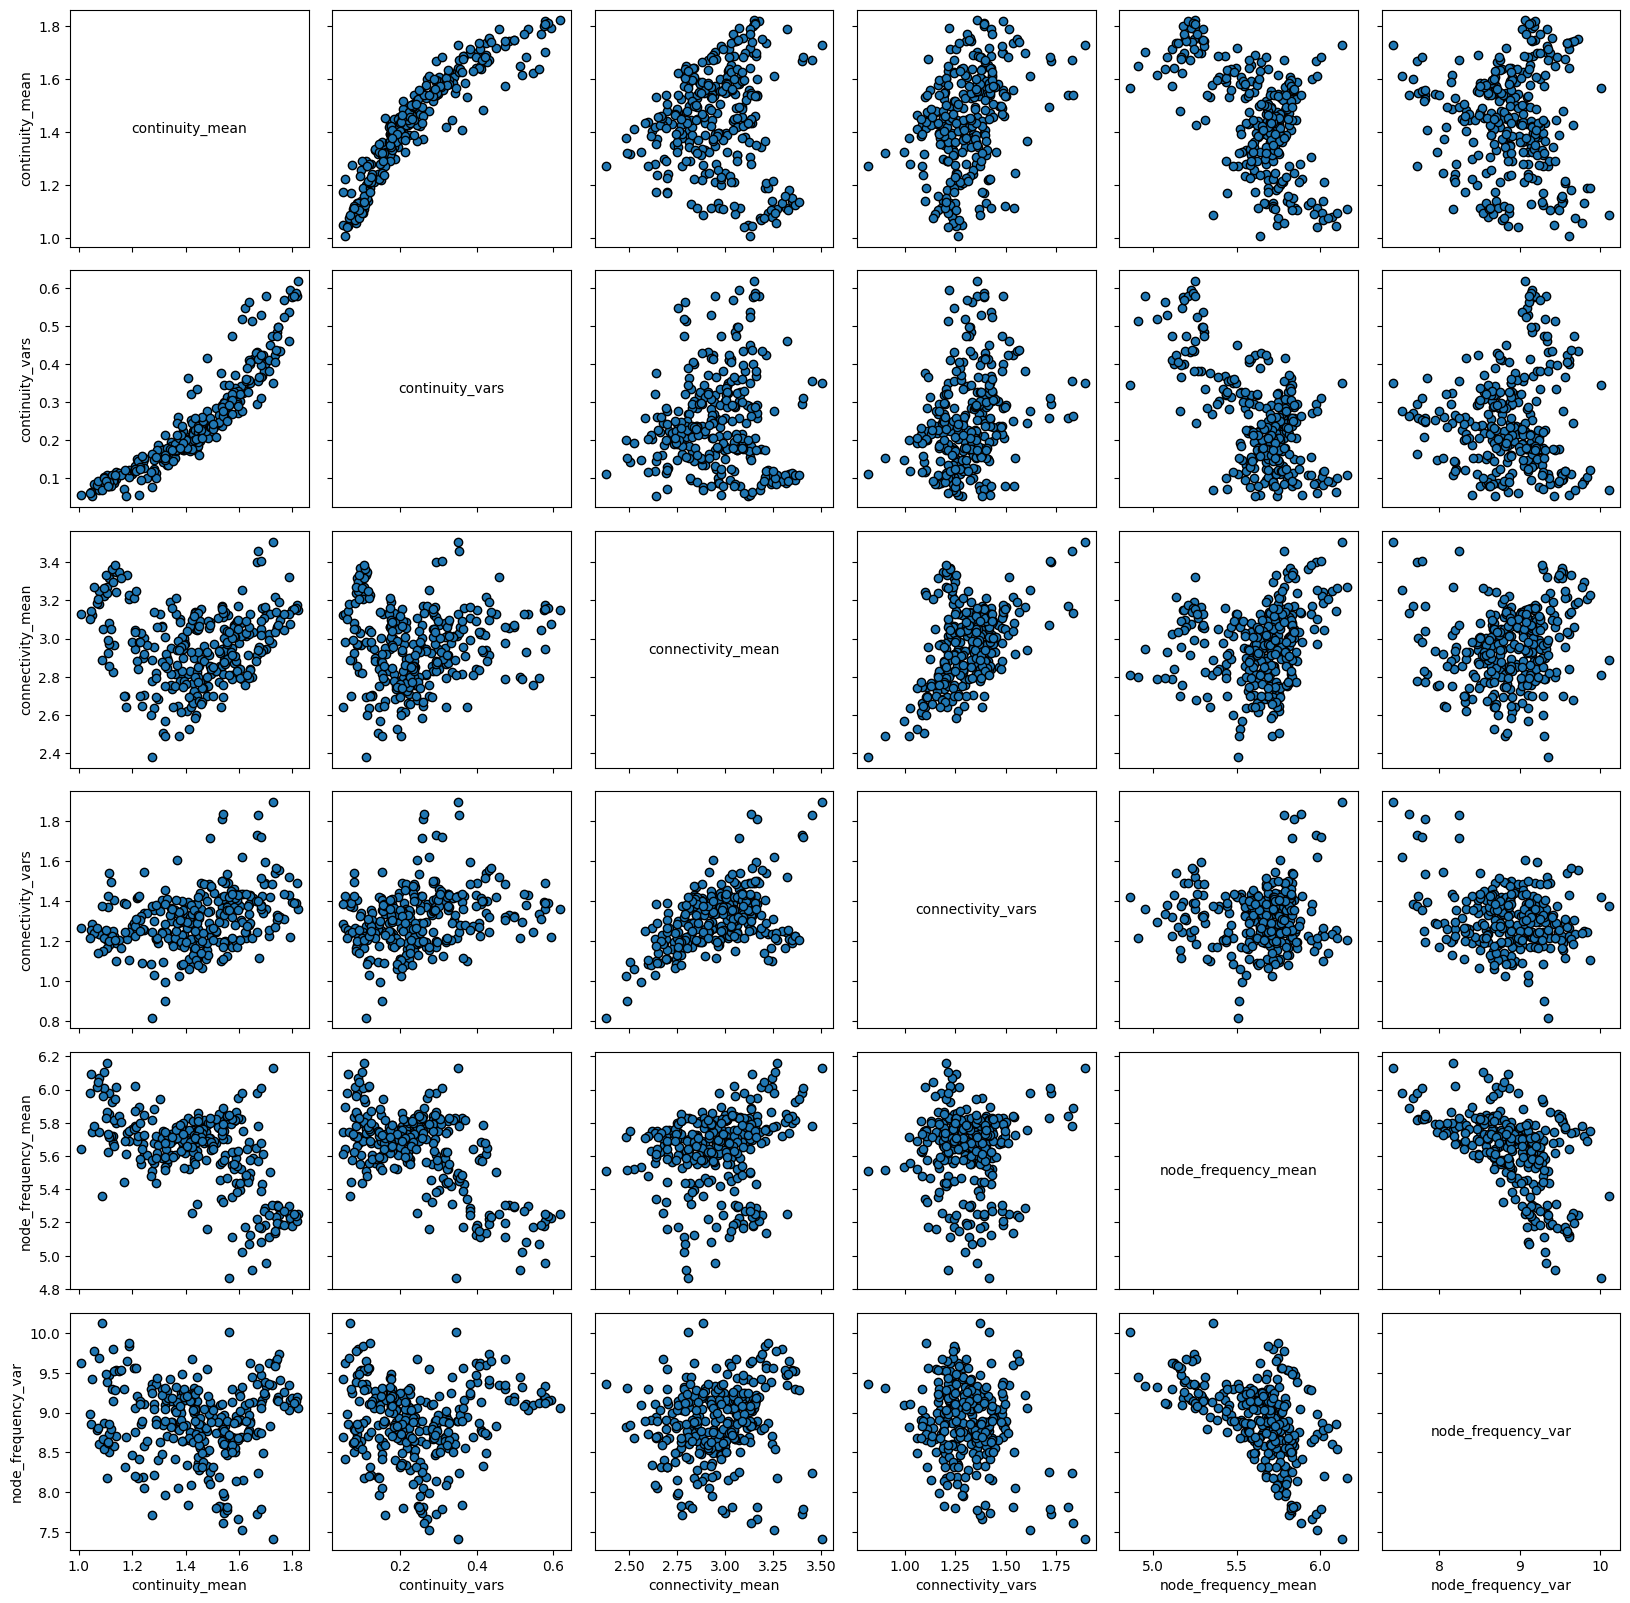

In [50]:
fig, axes = pairs_plotting.pairs_scatter(experiments_3333, outcomes_3333, legend=True)
fig.set_size_inches(20, 20)
plt.show()

In [40]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['TA1', "TA2", 'TA3']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_3333[value1], pd.DataFrame(outcomes_3333)[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_3333[value1], pd.DataFrame(outcomes_3333)[value2])[1]
     

In [41]:
corr_mat

continuity_mean continuity_var connectivity_mean connectivity_var  \
TA1        0.247269       0.213244          0.398573         0.258417   
TA2        0.719688       0.706711         -0.128071         0.131505   
TA3        0.085663       0.098462           0.21262         0.148361   

    node_frequency_mean node_frequency_var  
TA1            0.028094           0.106265  
TA2           -0.376544           -0.06087  
TA3           -0.055831           0.178595

In [42]:
p_mat

continuity_mean  continuity_var  connectivity_mean  connectivity_var  \
TA1     1.692209e-10    3.627249e-08       7.410379e-25      2.473745e-11   
TA2     3.904136e-77    1.910083e-74       9.393600e-04      6.818436e-04   
TA3     2.691933e-02    1.098223e-02       3.974627e-08      1.270162e-04   

     node_frequency_mean  node_frequency_var  
TA1         4.680475e-01            0.006054  
TA2         2.332751e-22            0.115890  
TA3         1.492730e-01            0.000004

### Seed 4444

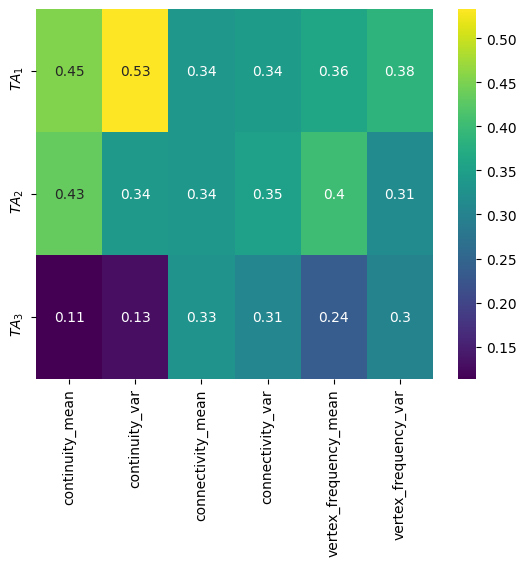

In [51]:
fs = feature_scoring.get_feature_scores_all(experiments_4444[column_names], outcomes_4444)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('TA_ETRF_seed4444.png', bbox_inches='tight')

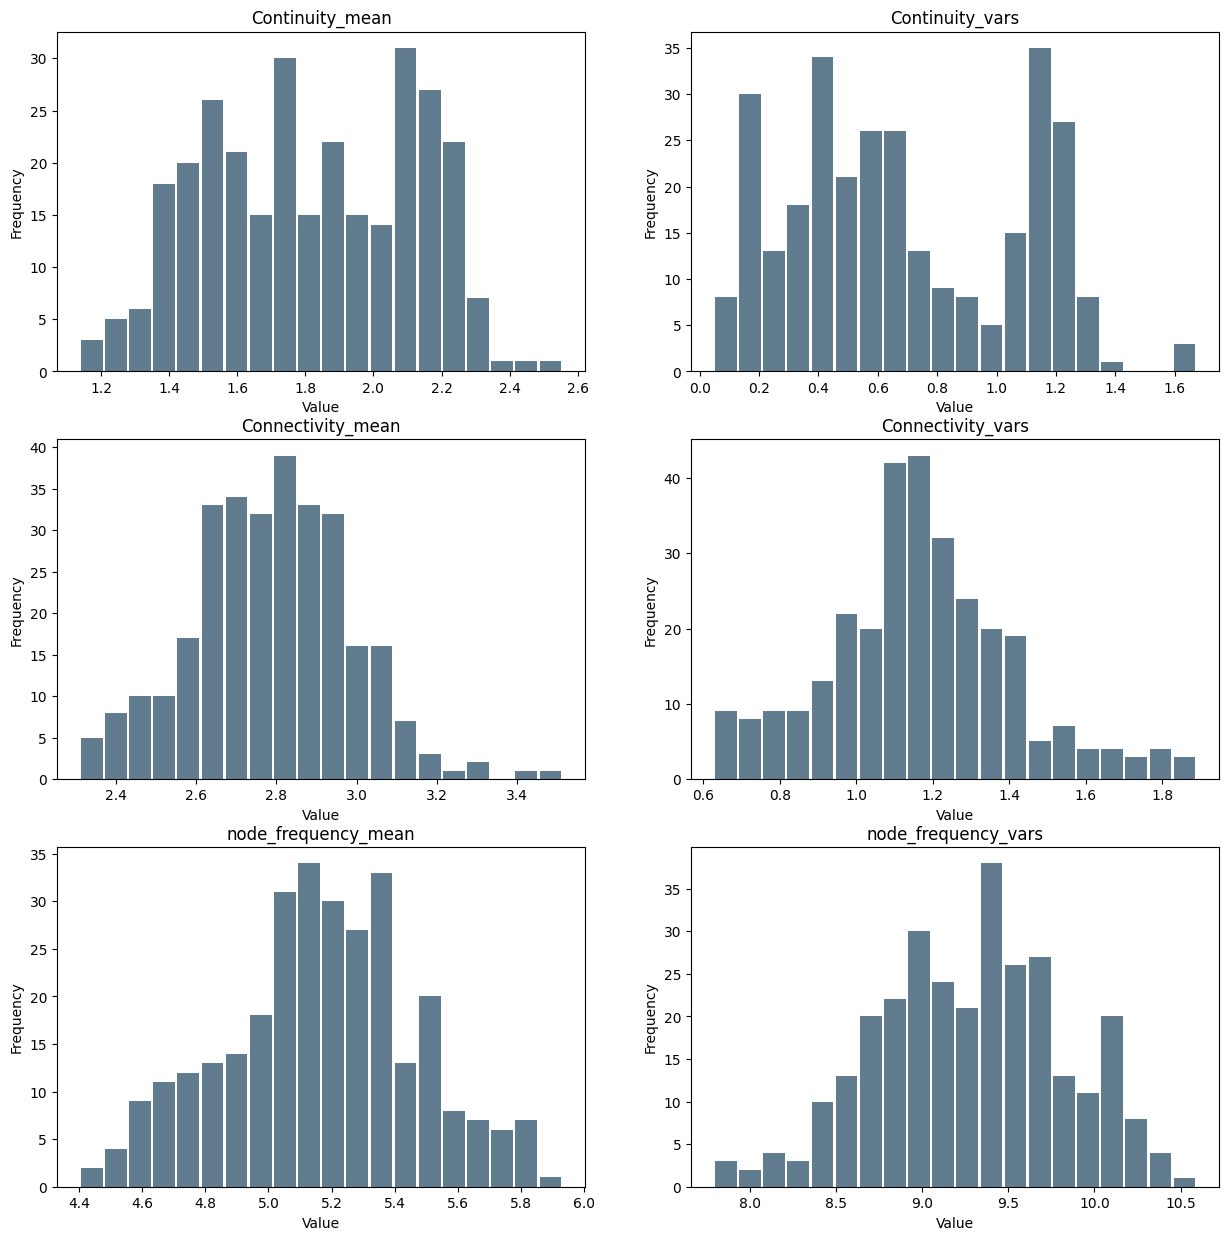

In [45]:
make_histogram_full(outcomes_4444)

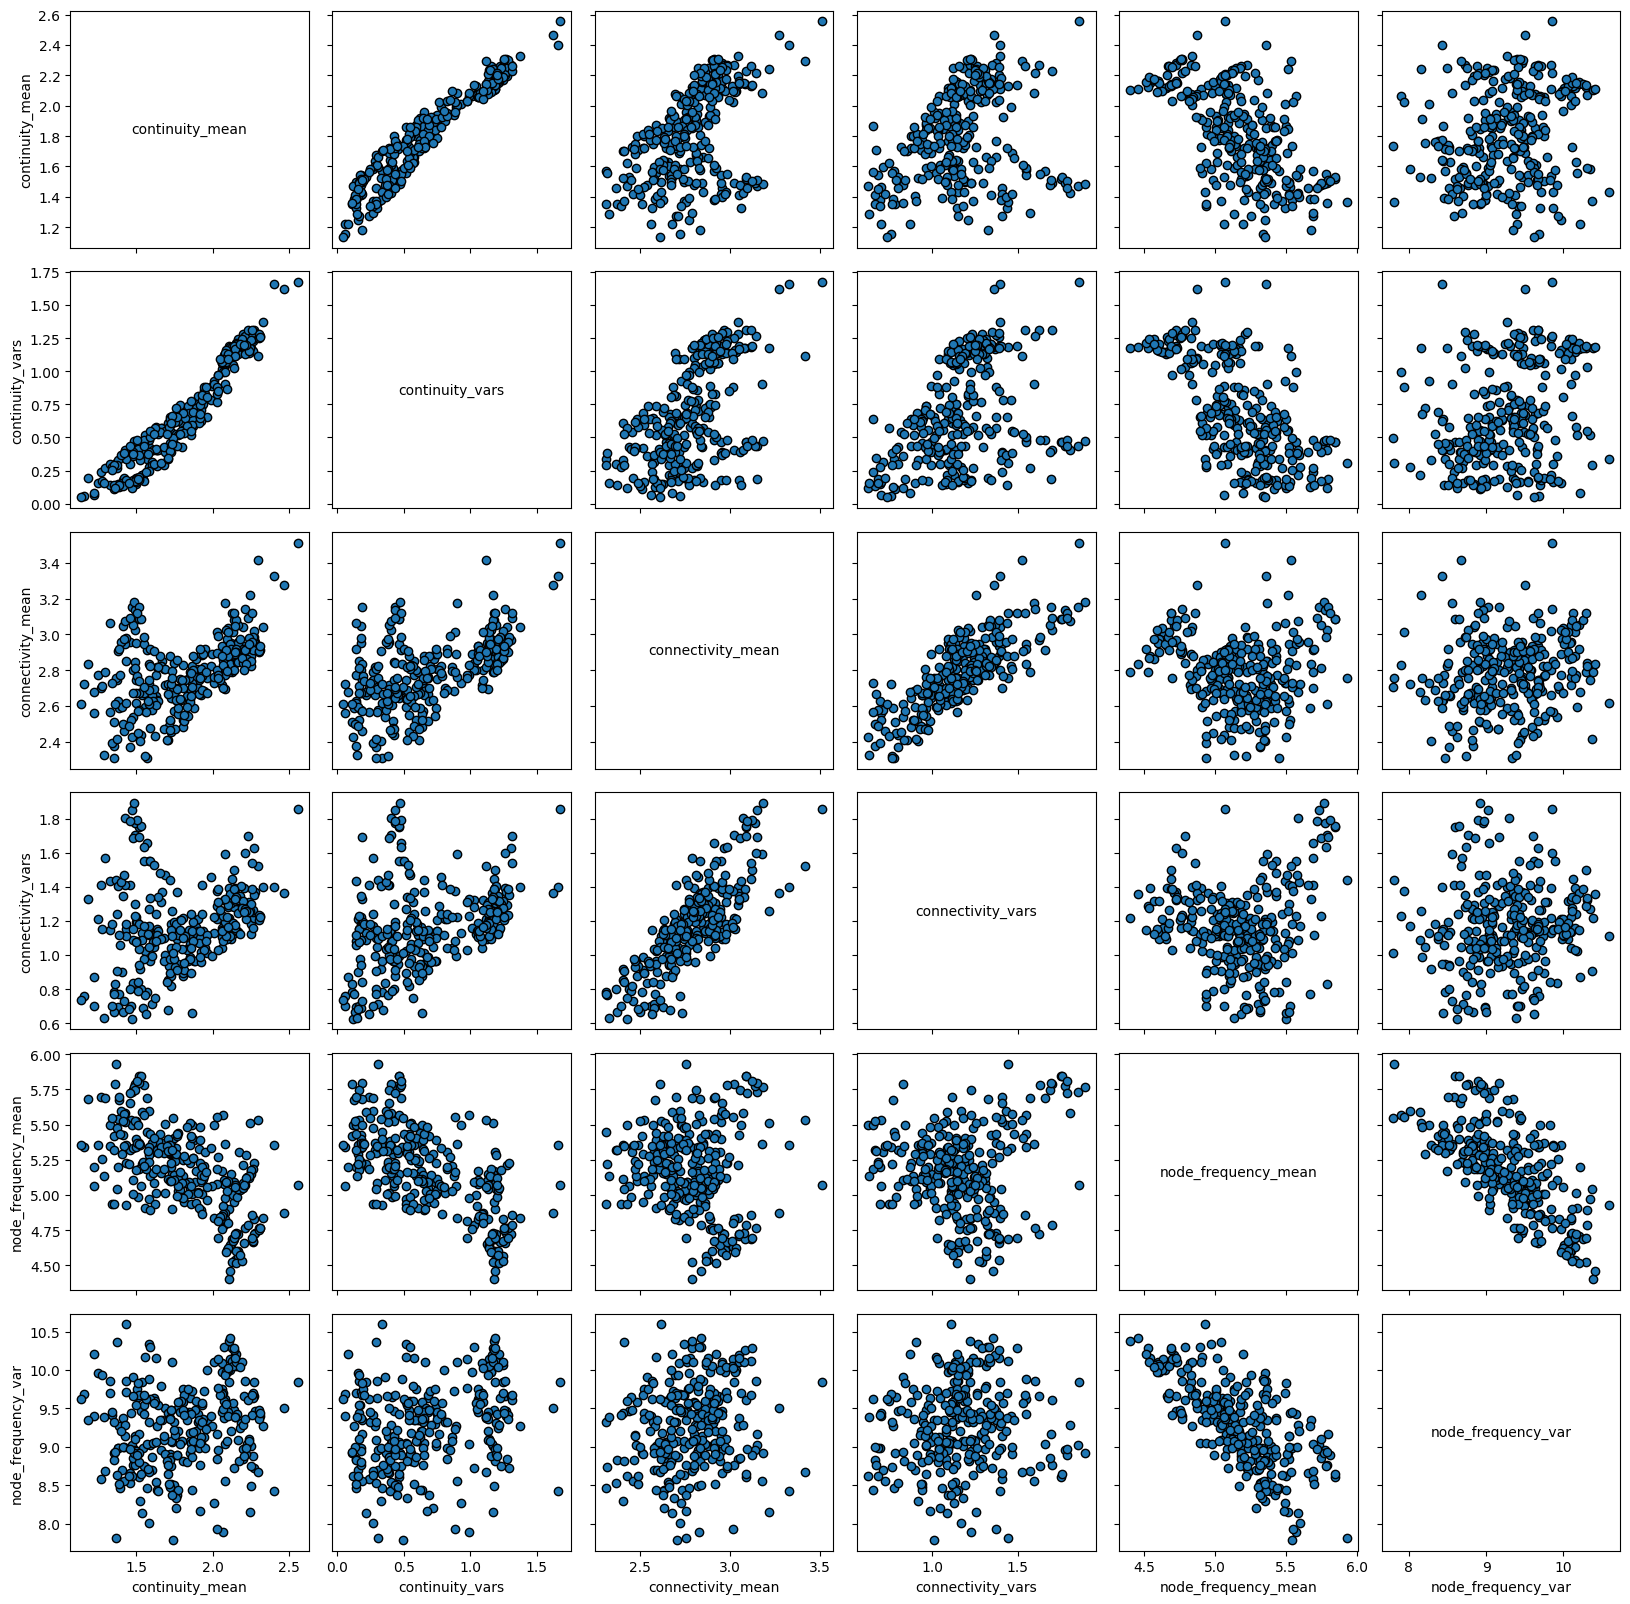

In [51]:
fig, axes = pairs_plotting.pairs_scatter(experiments_4444, outcomes_4444, legend=True)
fig.set_size_inches(20, 20)
plt.show()

In [43]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['TA1', "TA2", 'TA3']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_4444[value1], pd.DataFrame(outcomes_4444)[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_4444[value1], pd.DataFrame(outcomes_4444)[value2])[1]
     

In [44]:
corr_mat

continuity_mean continuity_var connectivity_mean connectivity_var  \
TA1        0.477235       0.564905          0.345017         0.317235   
TA2        0.500691       0.359153          0.172977          0.06029   
TA3        0.058595        0.05155          0.270903         0.154649   

    node_frequency_mean node_frequency_var  
TA1           -0.326421           0.261405  
TA2           -0.264972           0.049766  
TA3            -0.10631           0.102564

In [45]:
p_mat

continuity_mean  continuity_var  connectivity_mean  connectivity_var  \
TA1     6.481767e-35    3.180540e-48       5.021525e-19      2.522795e-16   
TA2     2.936682e-38    1.744430e-20       7.895827e-06      1.194020e-01   
TA3     1.301480e-01    1.830155e-01       2.606985e-12      6.480827e-05   

     node_frequency_mean  node_frequency_var  
TA1         3.413429e-17        1.457315e-11  
TA2         7.688499e-12        1.986337e-01  
TA3         6.032902e-03        8.067466e-03

### Seed 5555

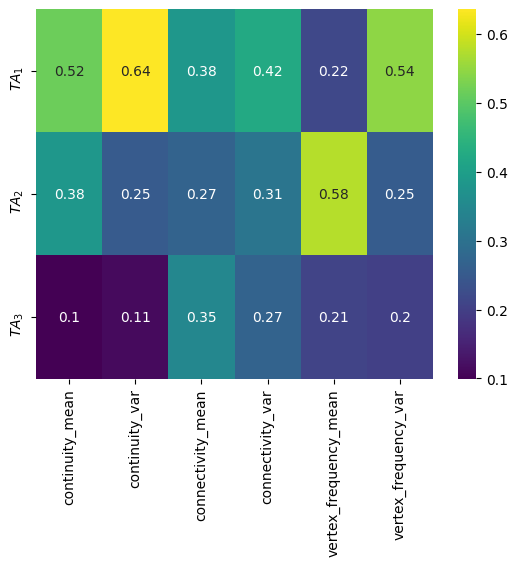

In [52]:
fs = feature_scoring.get_feature_scores_all(experiments_5555[column_names], outcomes_5555)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('TA_ETRF_seed5555.png', bbox_inches='tight')

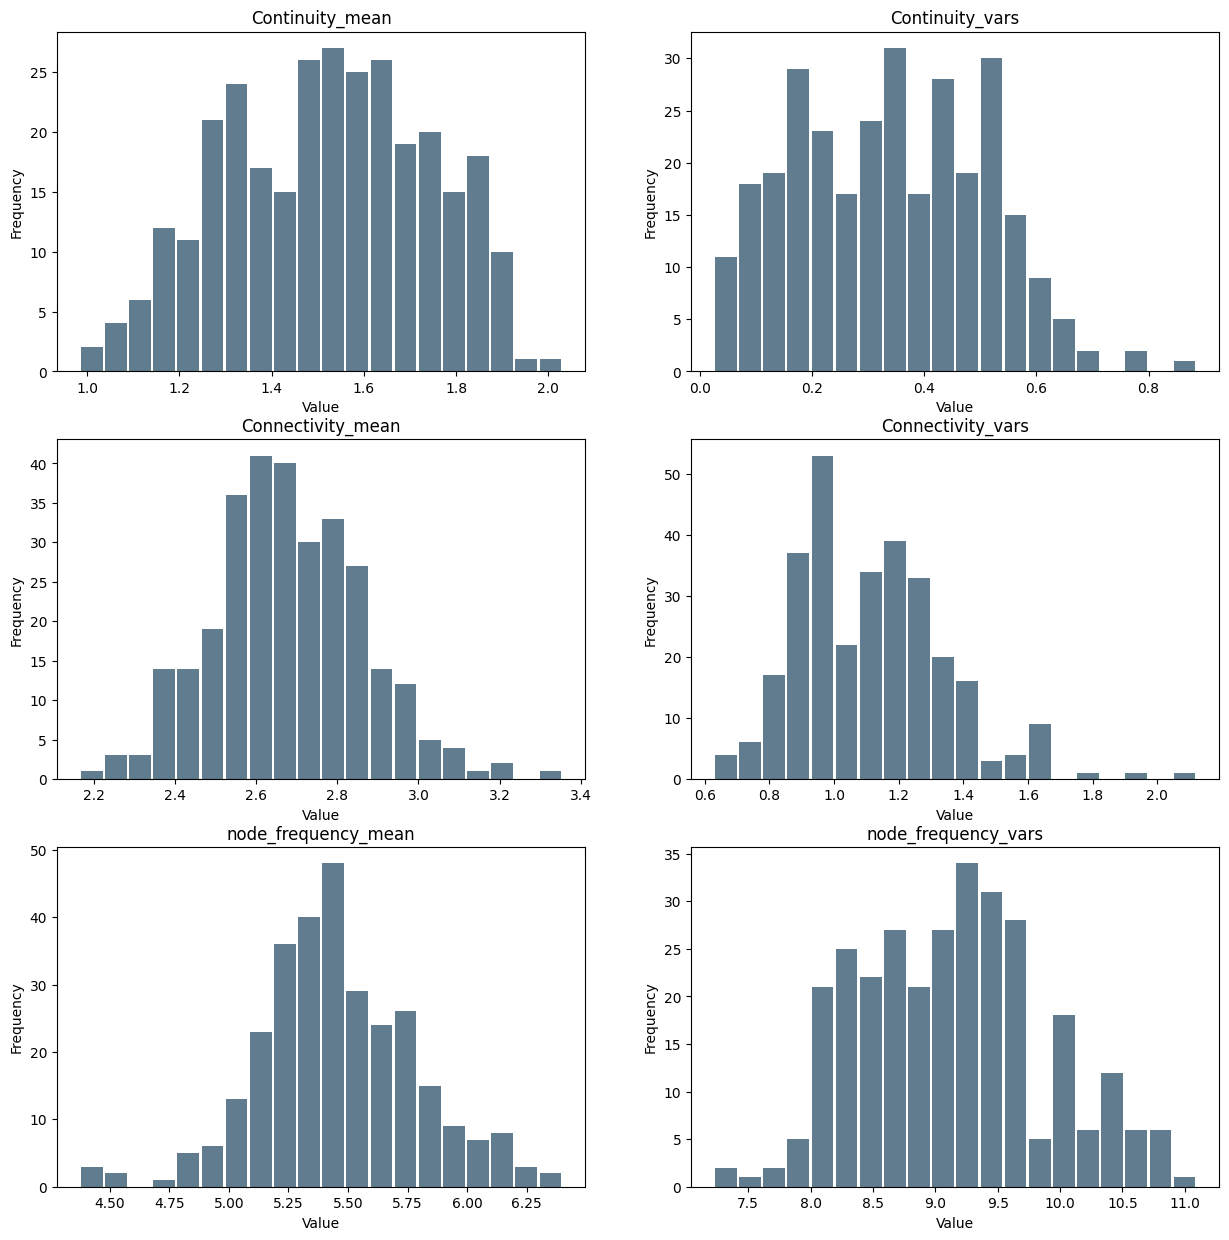

In [46]:
make_histogram_full(outcomes_5555)

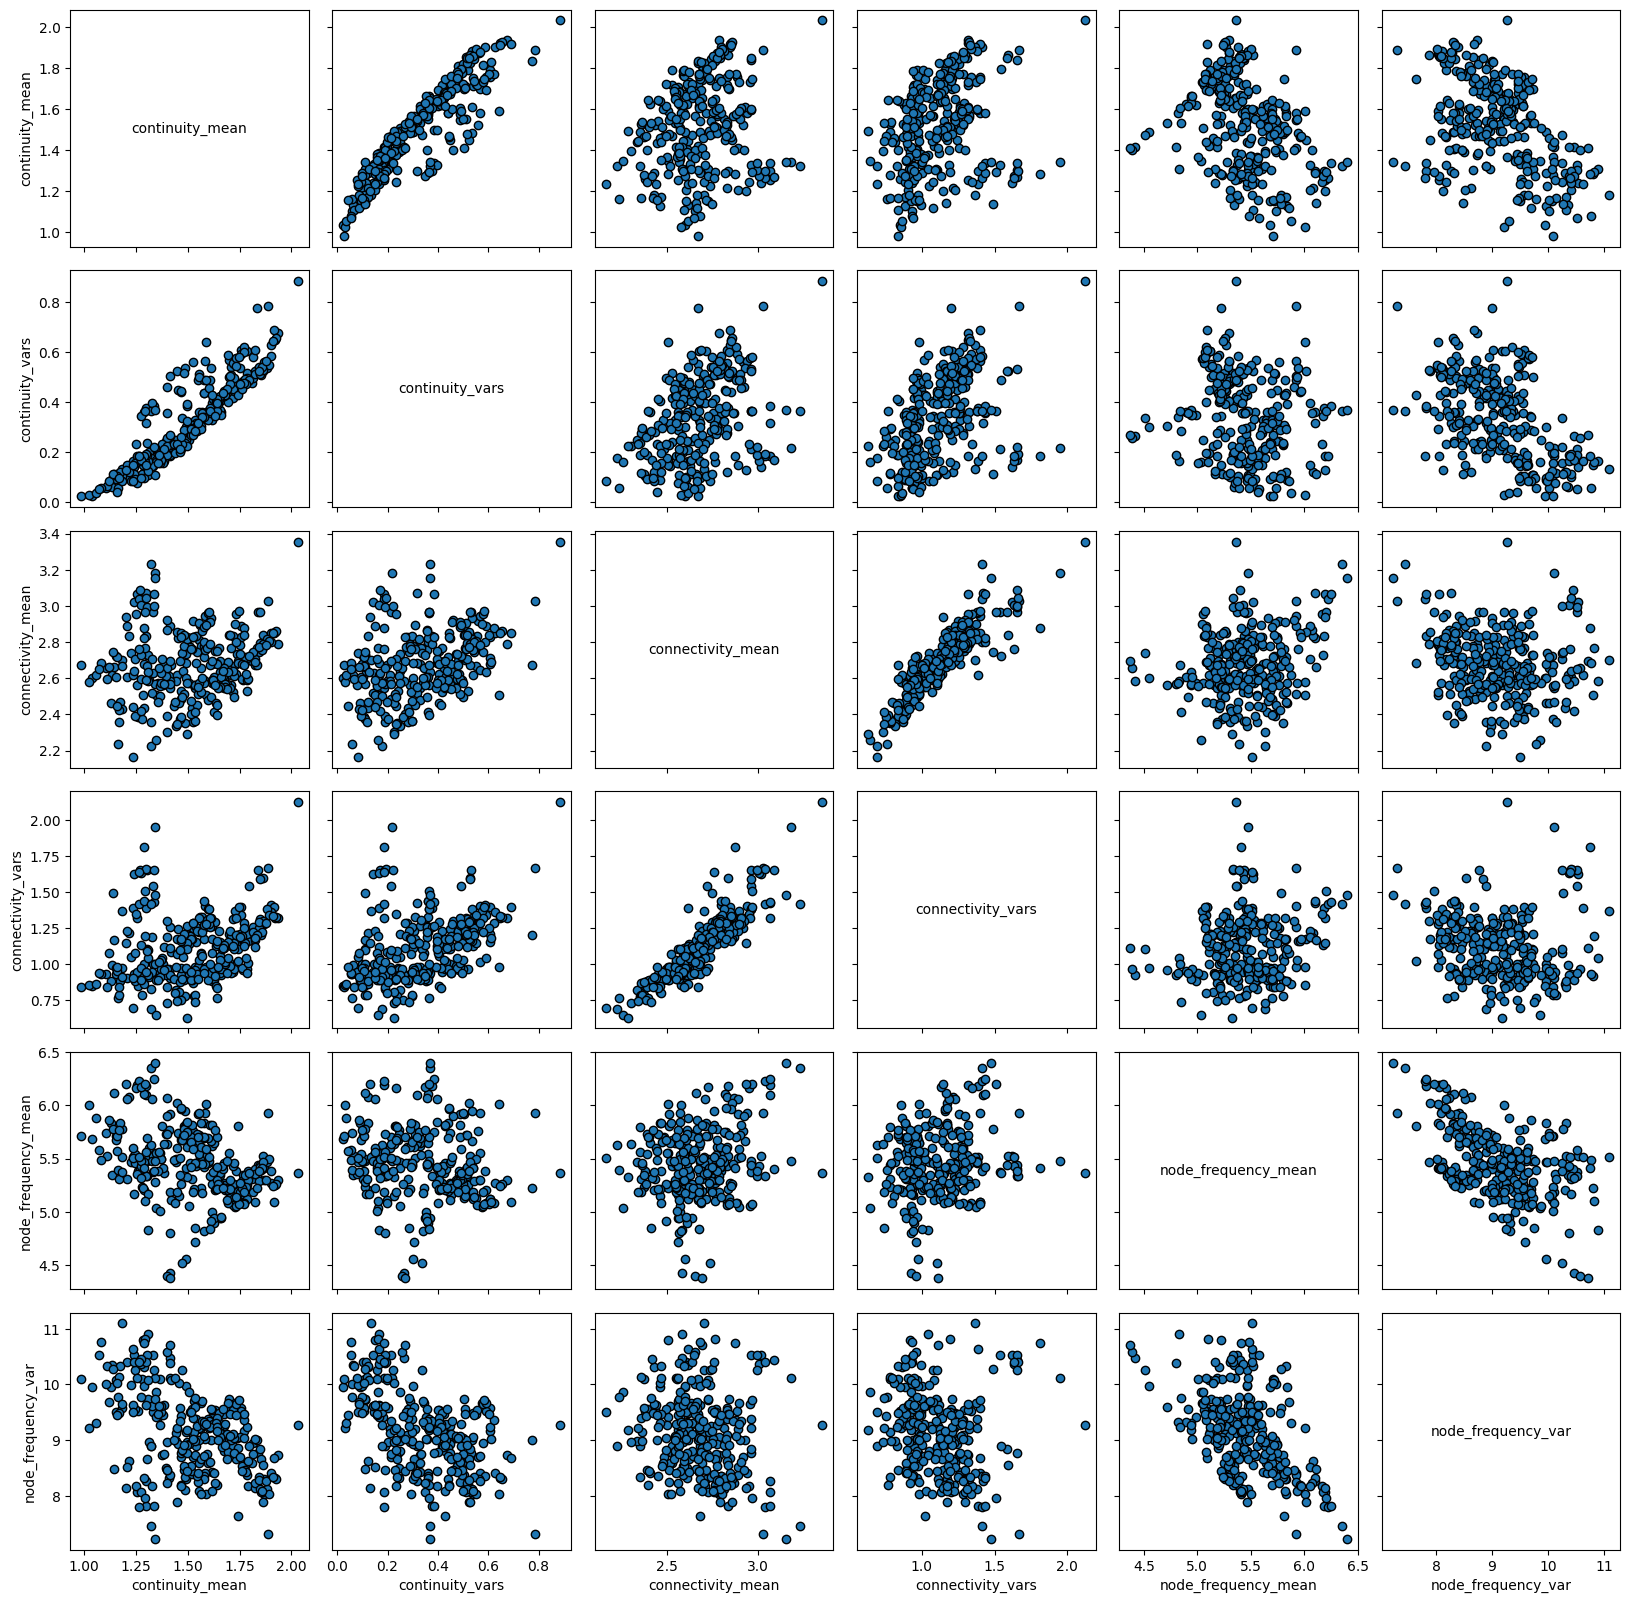

In [52]:
fig, axes = pairs_plotting.pairs_scatter(experiments_5555, outcomes_5555, legend=True)
fig.set_size_inches(20, 20)
plt.show()

In [46]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['TA1', "TA2", 'TA3']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_5555[value1], pd.DataFrame(outcomes_5555)[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_5555[value1], pd.DataFrame(outcomes_5555)[value2])[1]
     

In [47]:
corr_mat

continuity_mean continuity_var connectivity_mean connectivity_var  \
TA1        0.521873       0.667202          0.324192         0.380914   
TA2         0.46854       0.287893          0.003032         0.090702   
TA3        0.058105       0.037101          0.321605         0.206734   

    node_frequency_mean node_frequency_var  
TA1             0.02689          -0.421895  
TA2           -0.510992           0.052664  
TA3           -0.183055            0.12544

In [48]:
p_mat

continuity_mean  continuity_var  connectivity_mean  connectivity_var  \
TA1     2.051369e-41    1.479991e-66       5.575137e-17      7.645081e-23   
TA2     1.025830e-33    1.035585e-13       9.375694e-01      1.913741e-02   
TA3     1.333948e-01    3.378957e-01       9.809112e-17      9.298120e-08   

     node_frequency_mean  node_frequency_var  
TA1         4.873312e-01        1.183858e-27  
TA2         8.897814e-40        1.737275e-01  
TA3         2.264017e-06        1.194764e-03

### Seed 6666

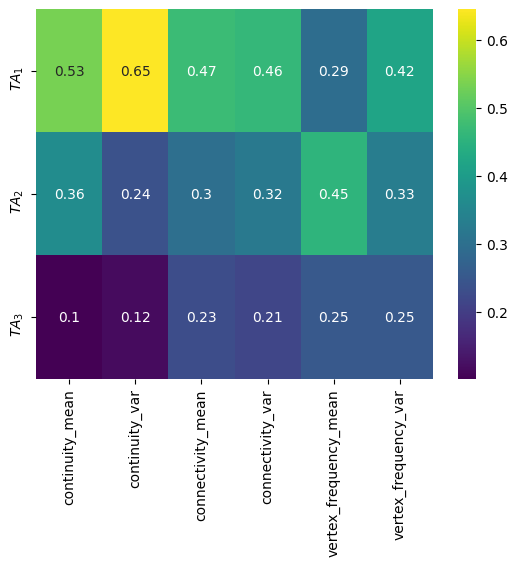

In [53]:
fs = feature_scoring.get_feature_scores_all(experiments_6666[column_names], outcomes_6666)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('TA_ETRF_seed6666.png', bbox_inches='tight')

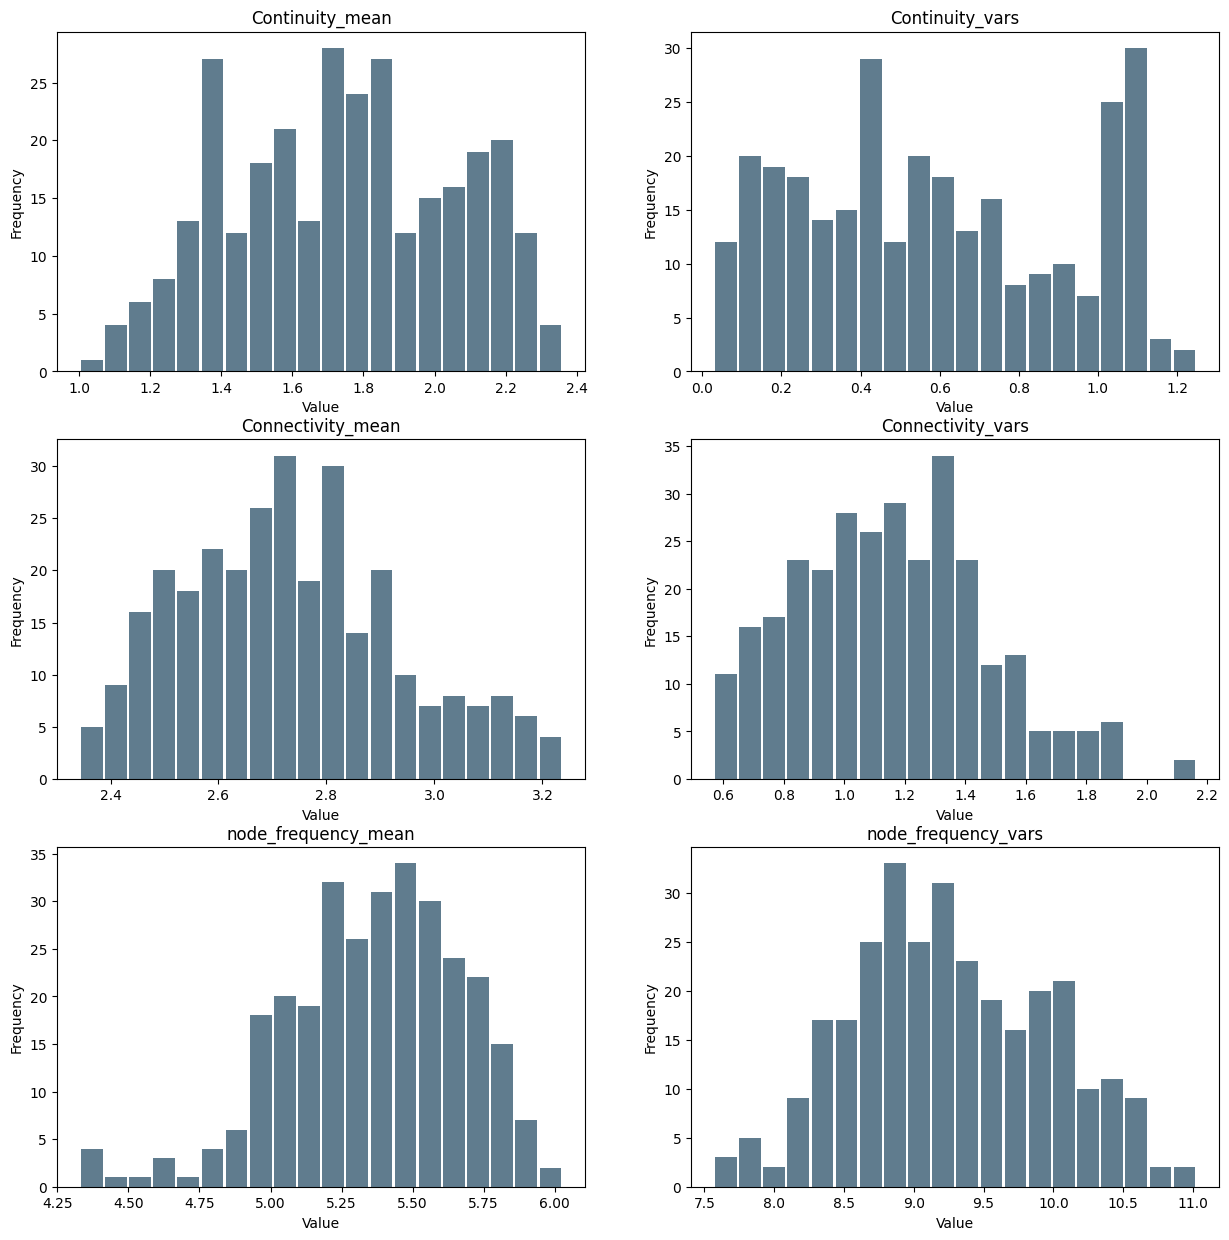

In [47]:
make_histogram_full(outcomes_6666)

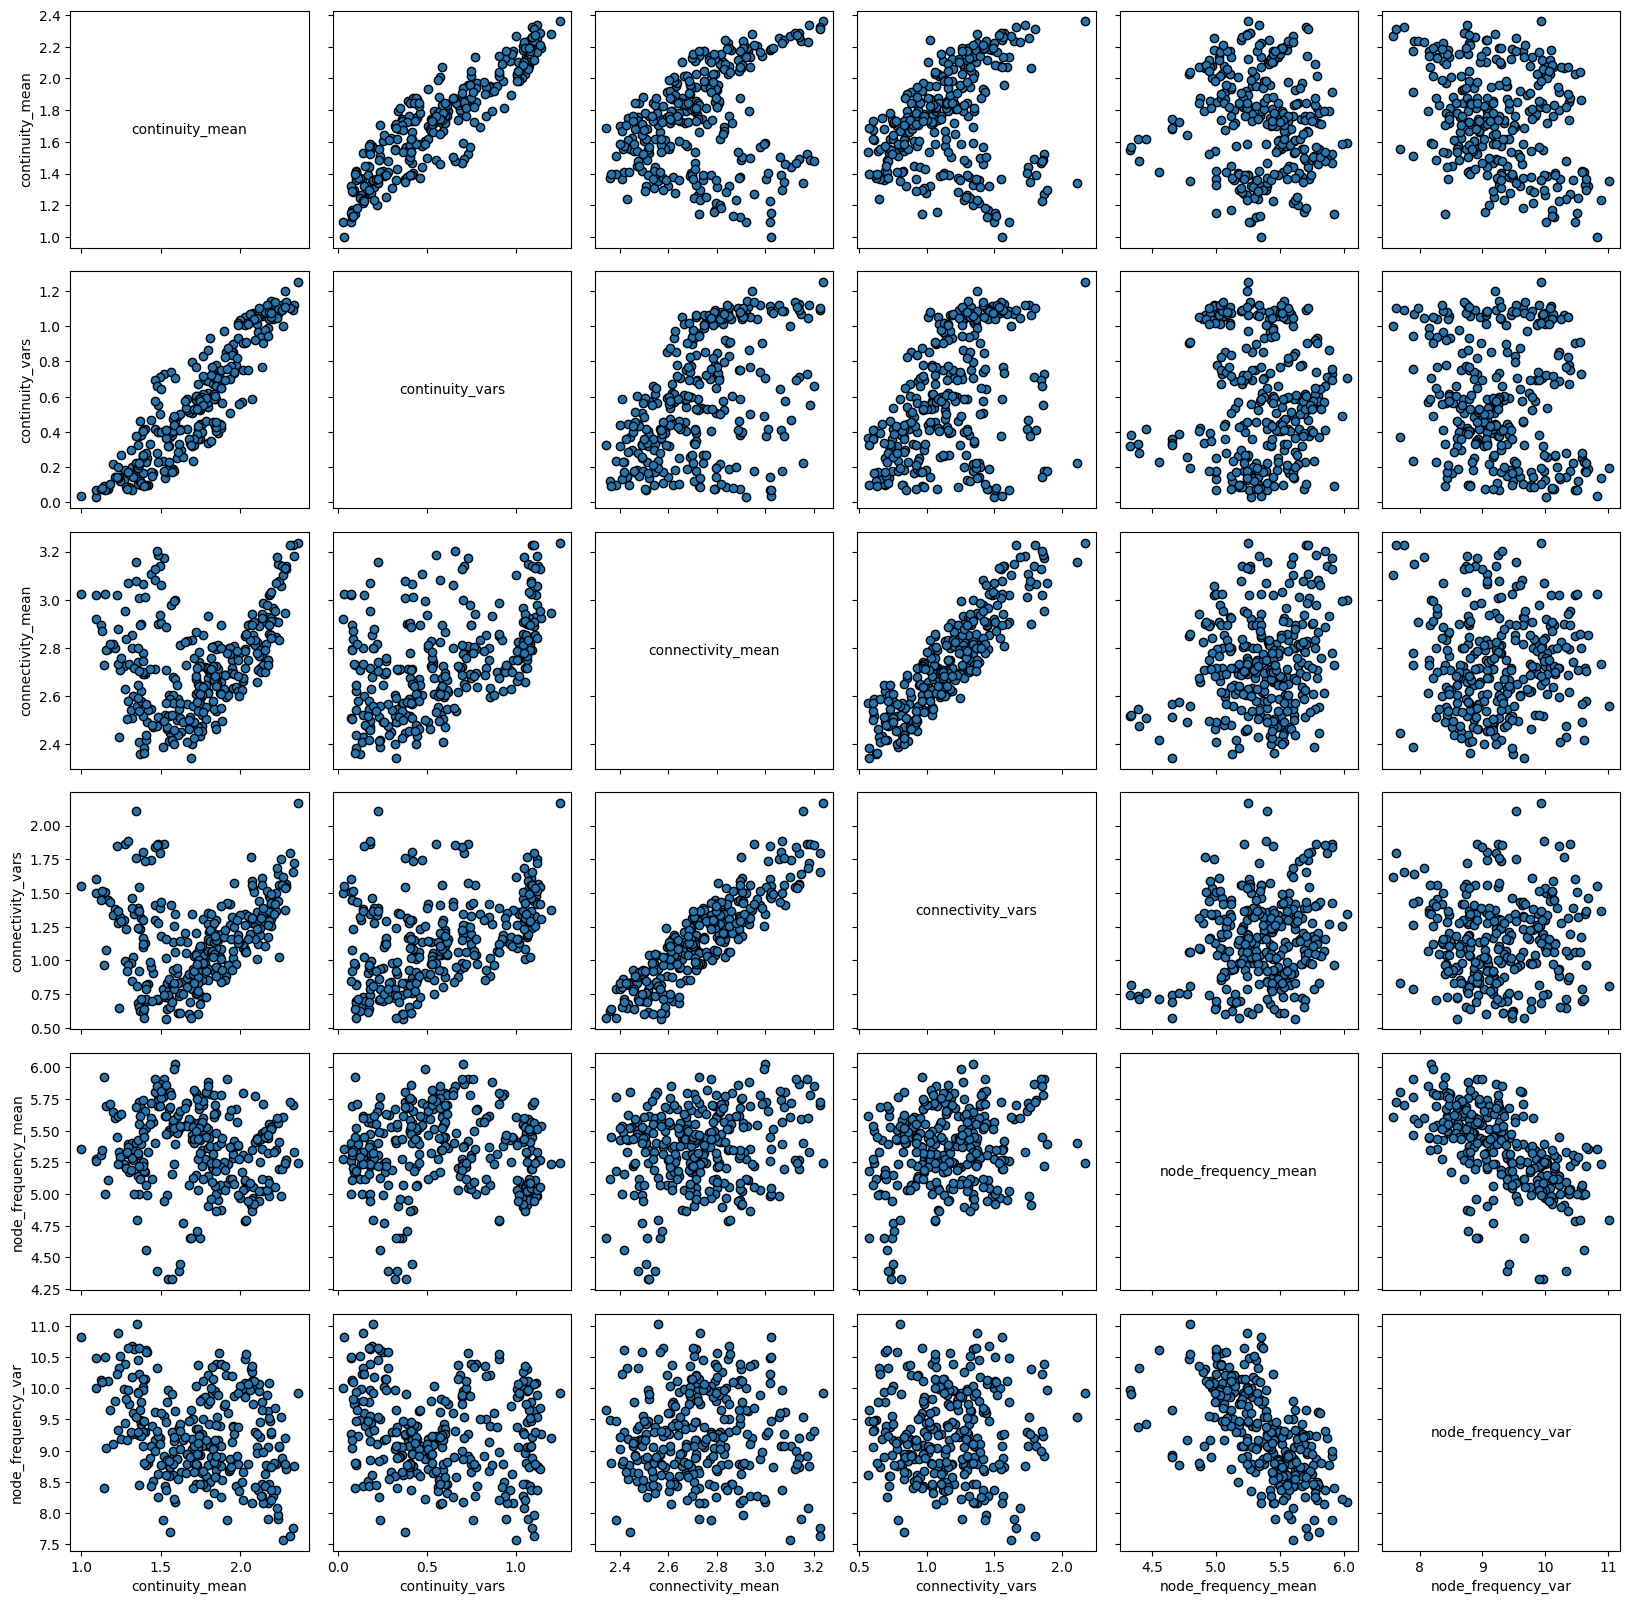

In [53]:
fig, axes = pairs_plotting.pairs_scatter(experiments_6666, outcomes_6666, legend=True)
fig.set_size_inches(20, 20)
plt.show()

In [49]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['TA1', "TA2", 'TA3']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_6666[value1], pd.DataFrame(outcomes_6666)[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_6666[value1], pd.DataFrame(outcomes_6666)[value2])[1]
     

In [50]:
corr_mat

continuity_mean continuity_var connectivity_mean connectivity_var  \
TA1        0.538863       0.653021          0.368071          0.29971   
TA2        0.446288       0.262742          0.015875         0.054002   
TA3        0.017659      -0.016321          0.167938         0.025998   

    node_frequency_mean node_frequency_var  
TA1            0.060736          -0.072018  
TA2           -0.343991          -0.046154  
TA3           -0.194158           0.119911

In [51]:
p_mat

continuity_mean  continuity_var  connectivity_mean  connectivity_var  \
TA1     4.867367e-44    7.796087e-64       1.956915e-21      9.823531e-15   
TA2     9.575477e-31    1.147718e-11       6.817654e-01      1.630524e-01   
TA3     6.482973e-01    6.733363e-01       1.438956e-05      5.018874e-01   

     node_frequency_mean  node_frequency_var  
TA1         1.166930e-01            0.062854  
TA2         6.374994e-19            0.233201  
TA3         5.300218e-07            0.001953

# Combined results

### combining the outcomes and experiments

In [18]:
experiments_2222['Origin destination location set']=1
experiments_3333['Origin destination location set']=2
experiments_4444['Origin destination location set']=3
experiments_5555['Origin destination location set']=4
experiments_6666['Origin destination location set']=5


In [19]:
experiments_combined = pd.concat([experiments_2222, experiments_3333, experiments_4444, experiments_5555, experiments_6666], ignore_index=True, sort=False)

In [20]:
outcomes_2222_pd = pd.DataFrame.from_dict(outcomes_2222)
outcomes_3333_pd = pd.DataFrame.from_dict(outcomes_3333)
outcomes_4444_pd = pd.DataFrame.from_dict(outcomes_4444)
outcomes_5555_pd = pd.DataFrame.from_dict(outcomes_5555)
outcomes_6666_pd = pd.DataFrame.from_dict(outcomes_6666)


In [21]:
outcomes_combined = pd.concat([outcomes_2222_pd, outcomes_3333_pd, outcomes_4444_pd, outcomes_5555_pd, outcomes_6666_pd], ignore_index=True, sort=False)

In [23]:
column_names.append('Origin destination location set')

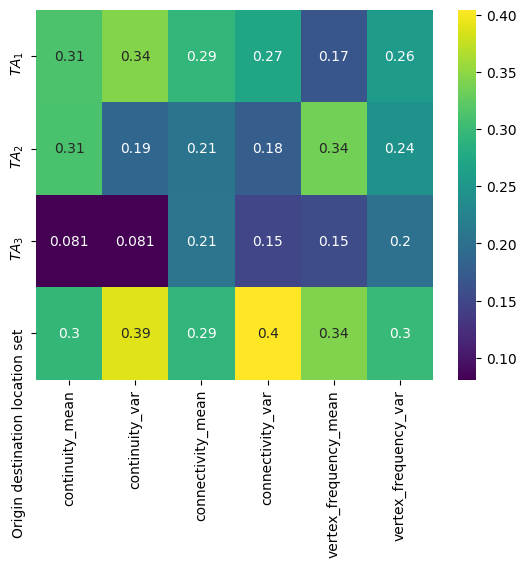

In [58]:
fs = feature_scoring.get_feature_scores_all(experiments_combined, outcomes_combined)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('TA_ETRF.png', bbox_inches='tight')

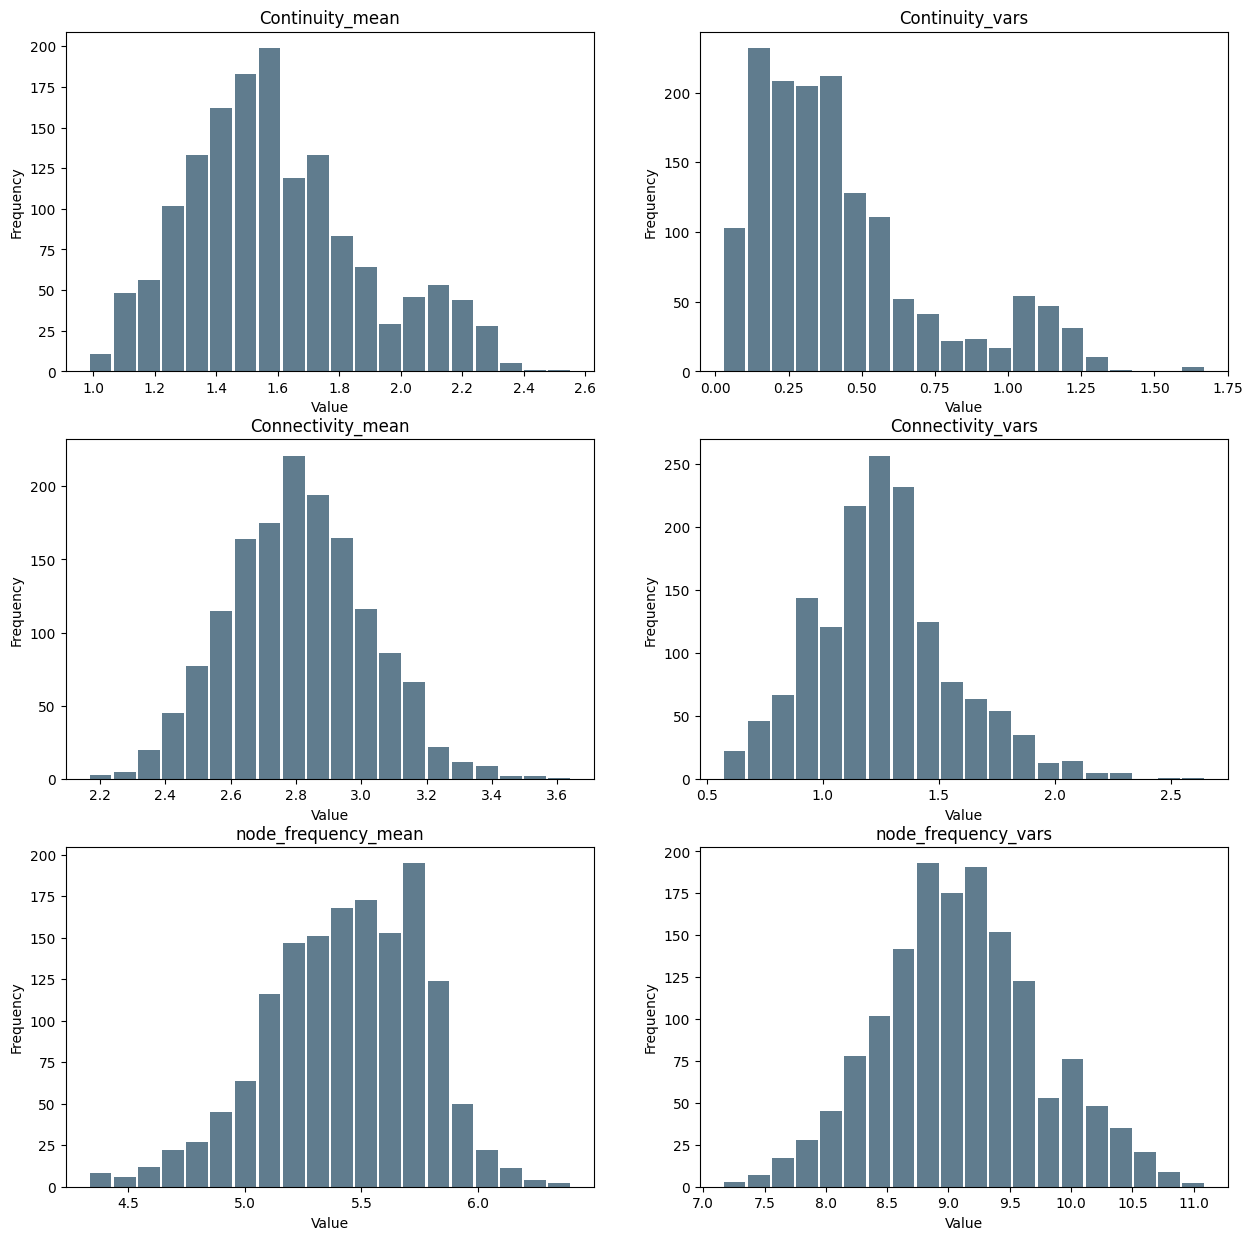

In [48]:
make_histogram_full(outcomes_combined)

In [60]:
outcomes_combined = {}
outcomes_combined['continuity_mean'] = np.concatenate((outcomes_2222['continuity_mean'], outcomes_3333['continuity_mean'], outcomes_4444['continuity_mean'], outcomes_5555['continuity_mean'], outcomes_6666['continuity_mean']))
outcomes_combined['continuity_var'] = np.concatenate((outcomes_2222['continuity_var'], outcomes_3333['continuity_var'], outcomes_4444['continuity_var'], outcomes_5555['continuity_var'], outcomes_6666['continuity_var']))
outcomes_combined['connectivity_mean'] = np.concatenate((outcomes_2222['connectivity_mean'], outcomes_3333['connectivity_mean'], outcomes_4444['connectivity_mean'], outcomes_5555['connectivity_mean'], outcomes_6666['connectivity_mean']))
outcomes_combined['connectivity_var'] = np.concatenate((outcomes_2222['connectivity_var'], outcomes_3333['connectivity_var'], outcomes_4444['connectivity_var'], outcomes_5555['connectivity_var'], outcomes_6666['connectivity_var']))
outcomes_combined['vertex_frequency_mean'] = np.concatenate((outcomes_2222['vertex_frequency_mean'], outcomes_3333['vertex_frequency_mean'], outcomes_4444['vertex_frequency_mean'], outcomes_5555['vertex_frequency_mean'], outcomes_6666['vertex_frequency_mean']))
outcomes_combined['vertex_frequency_var'] = np.concatenate((outcomes_2222['vertex_frequency_var'], outcomes_3333['vertex_frequency_var'], outcomes_4444['vertex_frequency_var'], outcomes_5555['vertex_frequency_var'], outcomes_6666['vertex_frequency_var']))


In [61]:
experiments_combined['continuity_mean'] = outcomes_combined['continuity_mean']
experiments_combined['continuity_var'] = outcomes_combined['continuity_var']
experiments_combined['connectivity_mean'] = outcomes_combined['connectivity_mean']
experiments_combined['connectivity_var'] = outcomes_combined['connectivity_var']
experiments_combined['vertex_frequency_mean'] = outcomes_combined['vertex_frequency_mean']
experiments_combined['vertex_frequency_var'] = outcomes_combined['vertex_frequency_var']

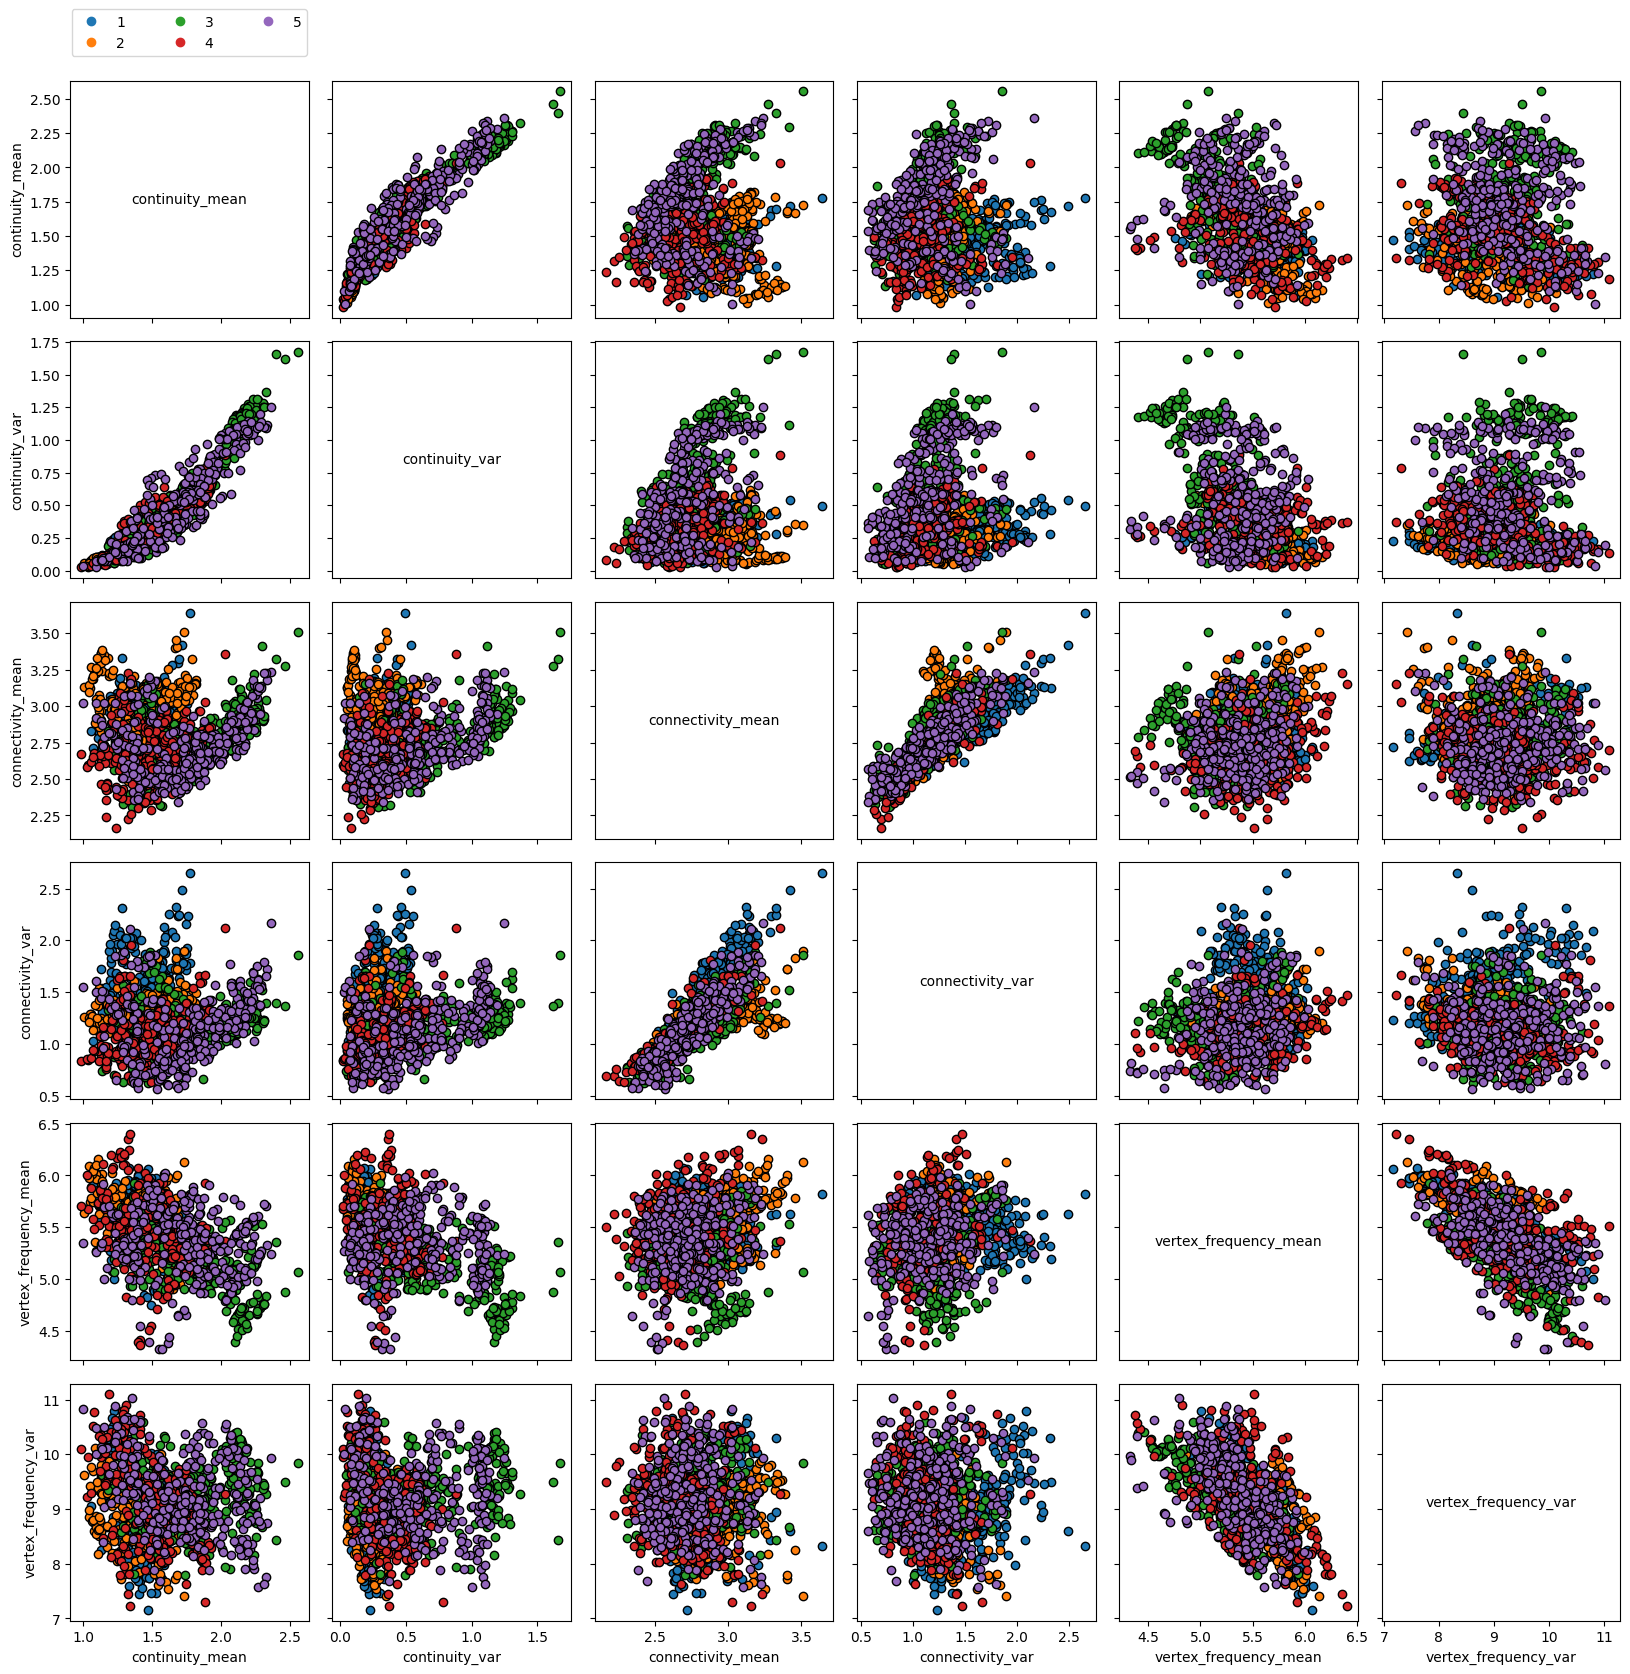

In [62]:
fig, axes = pairs_plotting.pairs_scatter(experiments_combined, outcomes_combined, group_by='Origin destination location set', grouping_specifiers = {1: 1, 2:2, 3:3, 4:4, 5:5}, legend=True)
fig.set_size_inches(20, 20)
# plt.show()

plt.savefig('corr_TA_run_all.png', bbox_inches='tight')

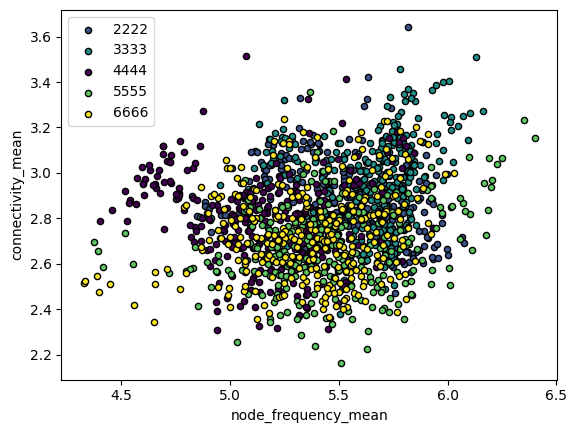

In [32]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = experiments_combined.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='node_frequency_mean', y='connectivity_mean', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_nf_mean_and_connectivity_mean_TA.png', bbox_inches='tight')


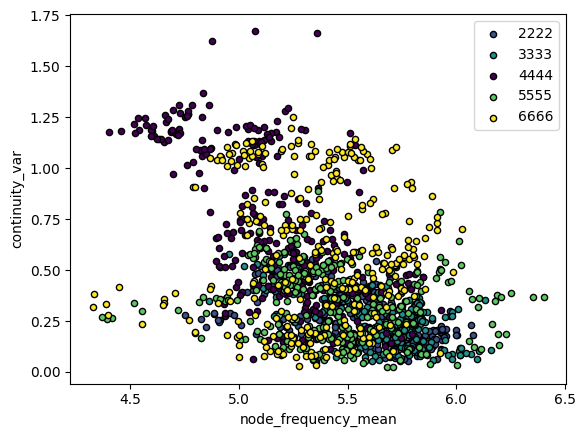

In [31]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = experiments_combined.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='node_frequency_mean', y='continuity_var', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_nf_mean_and_continuity_var_TA.png', bbox_inches='tight')


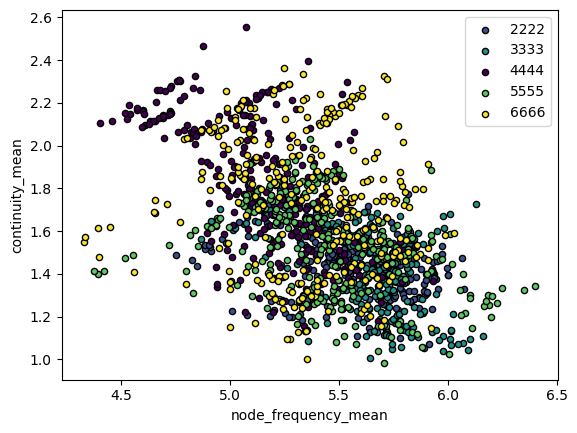

In [30]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = experiments_combined.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='node_frequency_mean', y='continuity_mean', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_nf_mean_and_continuity_mean_TA.png', bbox_inches='tight')


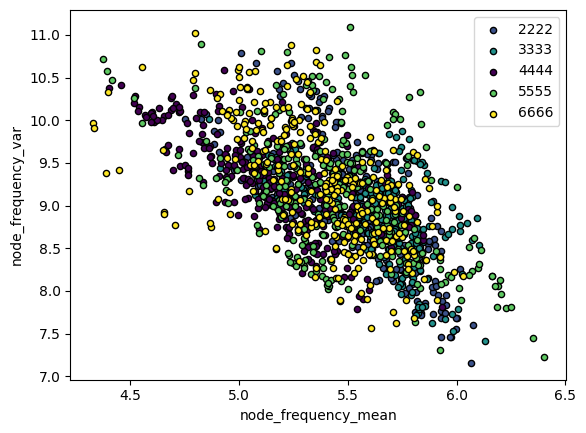

In [29]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = experiments_combined.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='node_frequency_mean', y='node_frequency_var', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_nf_mean_and_var_TA.png', bbox_inches='tight')


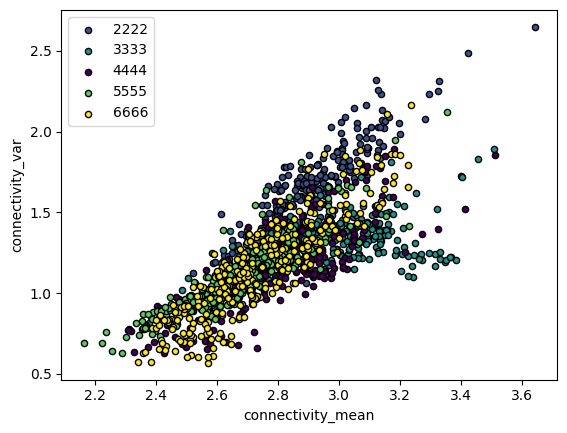

In [28]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = experiments_combined.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='connectivity_mean', y='connectivity_var', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_connectivity_mean_and_var_TA.png', bbox_inches='tight')


C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


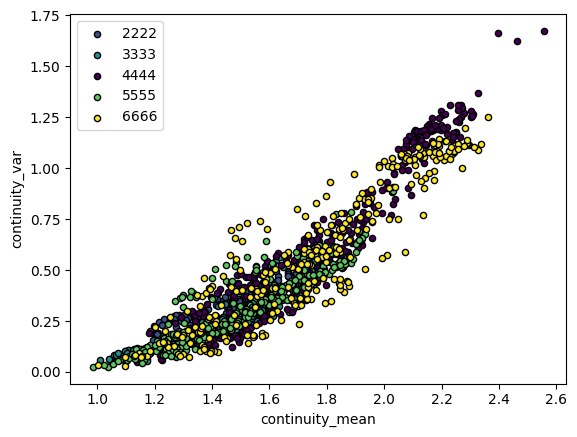

In [27]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = experiments_combined.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='continuity_mean', y='continuity_var', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_continuity_mean_and_var_TA.png', bbox_inches='tight')


In [52]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['TA1', "TA2", 'TA3']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_combined[value1], pd.DataFrame(outcomes_combined)[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(experiments_combined[value1], pd.DataFrame(outcomes_combined)[value2])[1]
     

In [53]:
corr_mat

continuity_mean continuity_var connectivity_mean connectivity_var  \
TA1        0.367692       0.444669          0.298058         0.255539   
TA2        0.395079       0.251971           0.03303         0.043677   
TA3        0.040093       0.027675          0.167624         0.057008   

    node_frequency_mean node_frequency_var  
TA1           -0.067075            0.00976  
TA2           -0.304859          -0.028314  
TA3            -0.10433            0.10804

In [54]:
p_mat

continuity_mean  continuity_var  connectivity_mean  connectivity_var  \
TA1    9.621798e-101   1.996597e-146       7.587575e-67      1.291530e-49   
TA2    5.236815e-116    2.739304e-48       5.561165e-02      1.137169e-02   
TA3     2.015937e-02    1.087667e-01       2.632791e-22      9.544236e-04   

     node_frequency_mean  node_frequency_var  
TA1         1.015018e-04        5.716725e-01  
TA2         7.588606e-70        1.008347e-01  
TA3         1.485796e-09        3.827034e-10

# Correlation

In [28]:
for key in outcomes_combined.keys():
    experiments_combined[key] = outcomes_combined.get(key)

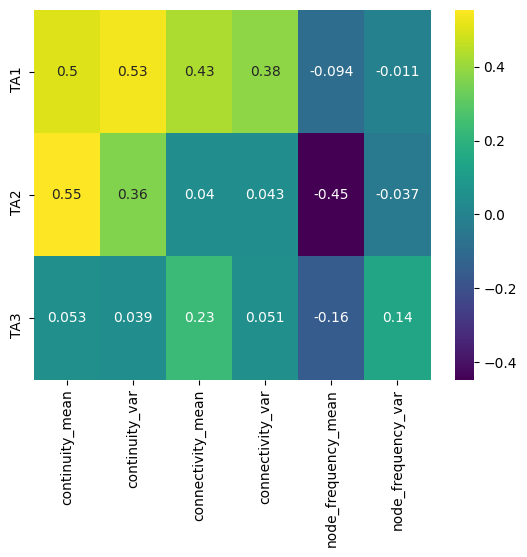

In [151]:
correlation_mat = experiments_combined[['TA1', 'TA2', 'TA3','continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']].corr()
corr_mat = correlation_mat[['TA1', 'TA2', 'TA3']].loc[['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']]
sns.heatmap(corr_mat.T, cmap="viridis", annot = True)
plt.savefig('TA_correlation.png', bbox_inches='tight')

In [19]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined[value1], outcomes_combined[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined[value1], outcomes_combined[value2])[1]
 

In [20]:
corr_mat.astype(float).round(3)

continuity_mean  continuity_var  connectivity_mean  \
continuity_mean                1.000           0.773              0.035   
continuity_var                 0.773           1.000              0.085   
connectivity_mean              0.035           0.085              1.000   
connectivity_var               0.001           0.080              0.603   
node_frequency_mean           -0.364          -0.331              0.122   
node_frequency_var            -0.013           0.028             -0.005   

                     connectivity_var  node_frequency_mean  node_frequency_var  
continuity_mean                 0.001               -0.364              -0.013  
continuity_var                  0.080               -0.331               0.028  
connectivity_mean               0.603                0.122              -0.005  
connectivity_var                1.000                0.112              -0.045  
node_frequency_mean             0.112                1.000              -0.446  
node_frequency_var             -0.045               -0.446               1.000

In [21]:
p_mat

continuity_mean  continuity_var  connectivity_mean  \
continuity_mean         0.000000e+00    0.000000e+00       3.976336e-02   
continuity_var          0.000000e+00    0.000000e+00       7.702283e-07   
connectivity_mean       3.976336e-02    7.702283e-07       0.000000e+00   
connectivity_var        9.715904e-01    3.760432e-06      1.710752e-268   
node_frequency_mean     3.909223e-99    1.997809e-82       1.209733e-12   
node_frequency_var      4.569605e-01    9.993995e-02       7.591576e-01   

                     connectivity_var  node_frequency_mean  node_frequency_var  
continuity_mean          9.715904e-01         3.909223e-99        4.569605e-01  
continuity_var           3.760432e-06         1.997809e-82        9.993995e-02  
connectivity_mean       1.710752e-268         1.209733e-12        7.591576e-01  
connectivity_var         0.000000e+00         9.560742e-11        8.521858e-03  
node_frequency_mean      9.560742e-11         0.000000e+00       6.499194e-148  
node_frequency_var       8.521858e-03        6.499194e-148        0.000000e+00